# Titulo: Análisis de factores económicos, sociales y demográficos que influyen en el desempeño de estudiantes de La Guajira en las pruebas SABER-PRO

- **Fuente de datos**: [Datos resultados saber pro 2018-2022](https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-Pro/u37r-hjmu/about_data)
- **Intro**:  La Prueba Saber Pro es un examen estandarizado aplicado en Colombia que tiene como objetivo evaluar las competencias y conocimientos de los estudiantes que están por graduarse de programas de educación superior. Este examen es organizado por el Instituto Colombiano para la Evaluación de la Educación (ICFES) y mide diversas competencias en áreas como razonamiento crítico, lectura crítica, matemáticas, ciencias naturales y sociales, así como competencias específicas relacionadas con el programa académico del estudiante. Esto permite evaluar el nivel de formación que los estudiantes han alcanzado al finalizar su carrera. Los resultados de la Prueba Saber Pro son utilizados por las instituciones de educación superior para mejorar la calidad de sus programas académicos. A través de estos resultados, las universidades pueden identificar áreas de fortaleza y debilidad en el desempeño de sus estudiantes, lo que les permite realizar ajustes curriculares y fortalecer las áreas donde los estudiantes presentan mayores dificultades. Así, la prueba no solo evalúa a los estudiantes, sino que también se convierte en una herramienta de retroalimentación para las instituciones.

- **Objetivo principal**: El objetivo de esta minería de datos educativos es analizar la relación entre las variables cuantitativas, demográficas, académicas y socioeconómicas de los estudiantes de La Guajira, para identificar patrones y tendencias que influyan en su rendimiento académico, específicamente en las pruebas SABER-PRO.

# 0. Librerias

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
path= os.getcwd()
print(os.listdir())
file_name=[x for x in os.listdir() if 'Saber_' in x][0]
file_name

['.git', 'actividadesbootcampds', 'Entrega_actividad_1.ipynb', 'Entrega_actividad_2.ipynb', 'Entrega_actividad_3.ipynb', 'Entrega_actividad_4.ipynb', 'laguajira_data.csv', 'laguajira_dataset.csv', 'Resultados_Saber_Pro.csv']


'Resultados_Saber_Pro.csv'

# 1. Data Extraction

In [2]:
full_path = os.path.join(path,file_name)
print(full_path)
#df=pd.read_csv(path+ '\\' +file_name,sep=",",encoding='utf-8')
df=pd.read_csv(full_path,sep=",",encoding='utf-8', low_memory=True)
df

c:\Users\andre\Documents\Bootcamp\Resultados_Saber_Pro.csv


,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830011083,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,161,174.0,3.0,A2,139,161.0,128
1,20183,EK201830053875,CC,COLOMBIA,76.0,VALLE,76736.0,SEVILLA,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,OFICIAL DEPARTAMENTAL,147,170.0,3.0,B1,171,188.0,182
2,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,...,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
3,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,...,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
4,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,...,Si,Educación profesional completa,OFICIAL DEPARTAMENTAL,114,132.0,2.0,A1,139,135.0,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217477,20222,EK202220148630,CC,COLOMBIA,41.0,HUILA,41396.0,LA PLATA,2.413960e+11,41396.0,...,Si,Primaria incompleta,OFICIAL NACIONAL,101,149.0,2.0,A2,153,134.0,140
1217478,20222,EK202220164335,CC,COLOMBIA,54.0,NORTE SANTANDER,54810.0,TIBÚ,1.548100e+11,54810.0,...,No,Primaria completa,NO OFICIAL - FUNDACIÓN,91,135.0,2.0,A2,100,132.0,93
1217479,20222,EK202220142587,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.230010e+11,23001.0,...,Si,Secundaria (Bachillerato) completa,NO OFICIAL - FUNDACIÓN,159,162.0,3.0,B1,190,178.0,163
1217480,20222,EK202220116355,CC,COLOMBIA,5.0,ANTIOQUIA,5001.0,MEDELLÍN,1.050010e+11,5001.0,...,Si,Secundaria (Bachillerato) incompleta,OFICIAL NACIONAL,179,156.0,3.0,A2,137,134.0,154


In [3]:
nombres_columnas = df.columns.tolist()
print(nombres_columnas)

['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_PAIS_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_MCPIO_RESIDE', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION', 'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION', 'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO', 'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO', 'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE', 'ESTU_GENERO', 'ESTU_COLE_TERMINO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_ESTADOINVESTIGACION', 'ESTU_FECHANACIMIENTO', 'ESTU_PAG

**Columnas de interes**: 
De las 57 columnas del dataset, se han seleccionado 29 variables. A continuaciónn está el desglose de cada tipo de variables:

1. Variables Cuantitativas- Resultados pruebas (7):
MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT, MOD_COMUNI_ESCRITA_DESEM, MOD_INGLES_DESEM, MOD_LECTURA_CRITICA_PUNT, MOD_INGLES_PUNT, MOD_COMPETEN_CIUDADA_PUNT

2. Datos Demográficos (5):
ESTU_PAIS_RESIDE, ESTU_DEPTO_RESIDE, ESTU_MCPIO_RESIDE, ESTU_NACIONALIDAD, ESTU_GENERO

3. Información Académica (6):
INST_CARACTER_ACADEMICO, ESTU_NUCLEO_PREGRADO, ESTU_INST_DEPARTAMENTO, ESTU_PRGM_ACADEMICO, ESTU_NIVEL_PRGM_ACADEMICO, ESTU_METODO_PRGM, PERIODO

4. Aspectos Económicos y Sociales (10):
ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_PAGOMATRICULABECA, ESTU_PAGOMATRICULACREDITO, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_TIENEAUTOMOVIL, FAMI_TIENELAVADORA, FAMI_ESTRATOVIVIENDA, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET

5. Trabajo y Gestión del Tiempo (1):
ESTU_HORASSEMANATRABAJA

Razones de la selección:

1. Variables Cuantitativas:

Las variables cuantitativas proporcionan datos medibles que permiten una evaluación precisa del rendimiento y habilidades del estudiante. Por ejemplo, MOD_RAZONA_CUANTITAT_PUNT mide las habilidades en razonamiento cuantitativo, lo cual es crucial para evaluar la capacidad del estudiante en resolución de problemas numéricos y análisis matemático. MOD_COMUNI_ESCRITA_PUNT evalúa la competencia en comunicación escrita, una habilidad indispensable para el éxito académico y profesional. MOD_INGLES_PUNT refleja el dominio del inglés, que es importante para el acceso a recursos globales y la adaptación en contextos internacionales. Finalmente, MOD_COMPETEN_CIUDADA_PUNT proporciona una medida de las habilidades en competencias ciudadanas, esenciales para una participación activa y efectiva en la sociedad.

2. Datos Demográficos:

Las variables demográficas ofrecen un contexto valioso sobre el entorno del estudiante y sus características personales. ESTU_TIPODOCUMENTO proporciona información sobre el tipo de documento de identidad del estudiante, relevante para cuestiones administrativas y legales. ESTU_PAIS_RESIDE muestra el país de residencia, lo que ayuda a entender el contexto cultural, social y económico que puede influir en el rendimiento académico. ESTU_DEPTO_RESIDE y ESTU_MCPIO_RESIDE ofrecen detalles adicionales sobre la región y municipio de residencia, lo que permite analizar cómo los factores locales pueden impactar el acceso a recursos y oportunidades educativas. ESTU_NACIONALIDAD brinda información sobre la nacionalidad del estudiante, lo que puede afectar su experiencia educativa. Por último, ESTU_GENERO es esencial para analizar la equidad de género en el acceso a la educación y el rendimiento académico.

3. Información Académica:

Las variables académicas son fundamentales para comprender las trayectorias educativas y el contexto académico del estudiante. INST_CARACTER_ACADEMICO indica el tipo de institución educativa (pública, privada, etc.), lo que permite comparar recursos y oportunidades entre diferentes instituciones. ESTU_NUCLEO_PREGRADO identifica el núcleo o programa de pregrado del estudiante, facilitando el análisis de las áreas de estudio. ESTU_INST_DEPARTAMENTO proporciona información sobre el departamento de la institución, lo que ayuda a evaluar los recursos y la calidad educativa. ESTU_PRGM_ACADEMICO especifica el programa académico del estudiante, útil para analizar las tendencias en el desempeño y la relación entre áreas de estudio. ESTU_NIVEL_PRGM_ACADEMICO categoriza el nivel del programa, permitiendo una comprensión más clara de las trayectorias educativas y sus efectos. Finalmente, ESTU_METODO_PRGM describe el método de enseñanza del programa, lo cual puede influir en el aprendizaje y el desempeño del estudiante.

4. Aspectos Económicos y Sociales:

Las variables económicas y sociales son cruciales para entender el impacto del entorno socioeconómico en el rendimiento académico. ESTU_VALORMATRICULAUNIVERSIDAD mide el costo de la matrícula universitaria, un factor importante que puede influir en la decisión de continuar los estudios y el rendimiento. ESTU_PAGOMATRICULABECA y ESTU_PAGOMATRICULACREDITO indican cómo se financia la matrícula, lo que puede afectar la estabilidad económica y el rendimiento del estudiante. FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE reflejan el nivel educativo de los padres, lo cual puede influir en el apoyo académico y los recursos disponibles para el estudiante. Además, FAMI_TIENEAUTOMOVIL, FAMI_TIENELAVADORA, FAMI_ESTRATOVIVIENDA, FAMI_TIENECOMPUTADOR, y FAMI_TIENEINTERNET proporcionan información sobre las condiciones de vida y el acceso a recursos tecnológicos, lo cual es relevante para evaluar el contexto económico y social del estudiante.

5. Trabajo y Gestión del Tiempo:

La variable ESTU_HORASSEMANATRABAJA ofrece información sobre la cantidad de horas que el estudiante trabaja semanalmente. Esta información es clave para analizar cómo el trabajo a tiempo parcial o completo puede afectar el rendimiento académico y la capacidad del estudiante para gestionar sus responsabilidades. 



In [4]:
#!pip install -q seaborn matplotlib

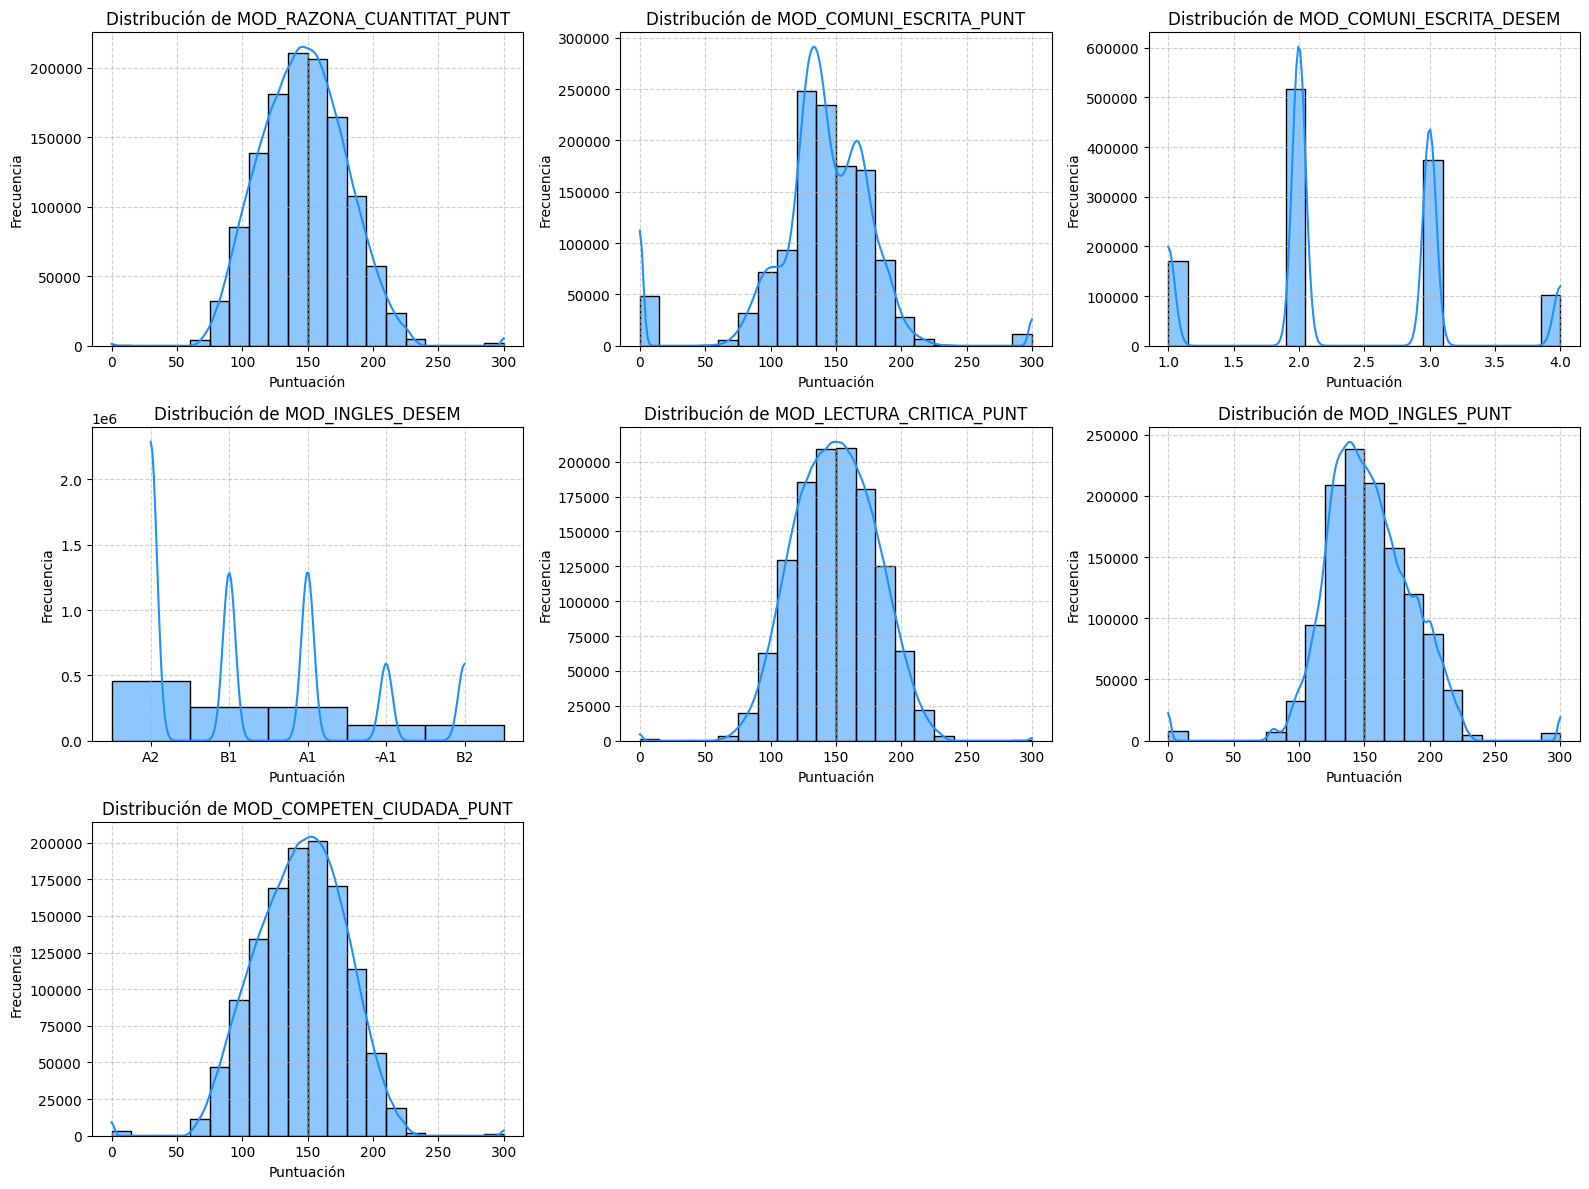

In [5]:
# Lista de variables cuantitativas
variables_cuantitativas = [
    'MOD_RAZONA_CUANTITAT_PUNT',
    'MOD_COMUNI_ESCRITA_PUNT',
    'MOD_COMUNI_ESCRITA_DESEM',
    'MOD_INGLES_DESEM',
    'MOD_LECTURA_CRITICA_PUNT',
    'MOD_INGLES_PUNT',
    'MOD_COMPETEN_CIUDADA_PUNT'
]

plt.figure(figsize=(16, 12))

for i, variable in enumerate(variables_cuantitativas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[variable], bins=20, kde=True, color='dodgerblue')
    plt.title(f'Distribución de {variable}', fontsize=12)
    plt.xlabel('Puntuación', fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

La gráfica presenta los resultados de todas las competencias genéricas evaluadas en la prueba Saber Pro. Se observa que las distribuciones de 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', y 'MOD_COMPETEN_CIUDADA_PUNT' siguen una distribución normal, con una mayor frecuencia alrededor de 150, que representa la media para estas pruebas. En general, hay pocos estudiantes que se acercan a la puntuación máxima en cada una de estas competencias.

En cuanto al desempeño en 'MOD_COMUNI_ESCRITA_DESEM', la mayoría de los resultados se concentran en el nivel 2, con un desempeño que llega hasta 4. En 'MOD_INGLES_DESEM', el nivel más frecuente es A2, mientras que los niveles BA y A1 tienen una frecuencia similar.

In [6]:
conteos = df.groupby(['FAMI_ESTRATOVIVIENDA', 'ESTU_GENERO']).size().reset_index(name='count')

# Mostrar los conteos
print(conteos)

   FAMI_ESTRATOVIVIENDA ESTU_GENERO   count
0             Estrato 1           F  130180
1             Estrato 1           M   75679
2             Estrato 2           F  247535
3             Estrato 2           M  162243
4             Estrato 3           F  210549
5             Estrato 3           M  155473
6             Estrato 4           F   61937
7             Estrato 4           M   50630
8             Estrato 5           F   21880
9             Estrato 5           M   18790
10            Estrato 6           F   11488
11            Estrato 6           M   10220
12          Sin Estrato           F    3012
13          Sin Estrato           M    2661


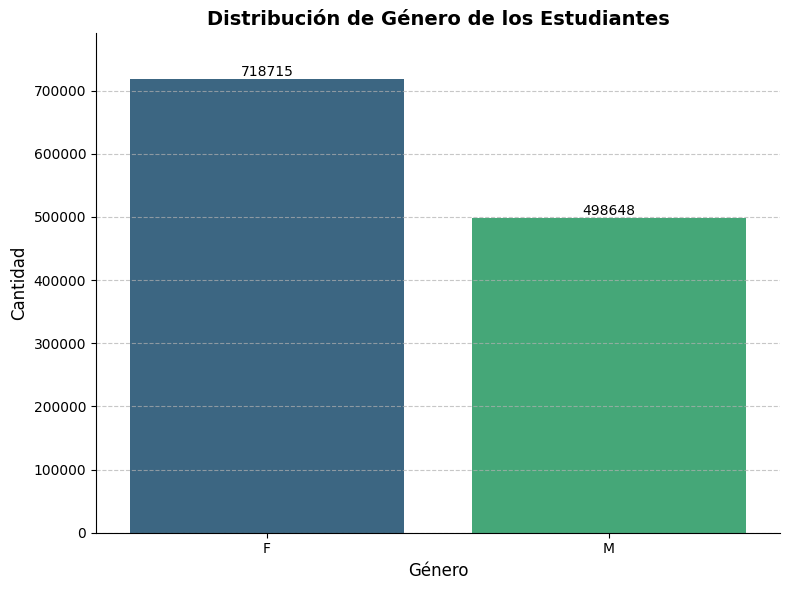

In [7]:
gender_counts = df['ESTU_GENERO'].value_counts().reset_index()
gender_counts.columns = ['Género', 'Cantidad']

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='Género', y='Cantidad', palette='viridis')
plt.title('Distribución de Género de los Estudiantes', fontsize=14, weight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
for index, row in gender_counts.iterrows():
    plt.text(row.name, row['Cantidad'] + 0.5, f'{row["Cantidad"]}', ha='center', va='bottom', fontsize=10, color='black')
# Estetica
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, gender_counts['Cantidad'].max() * 1.1)  # Espacio en barra
sns.despine()
plt.tight_layout()
plt.show()


El gráfico muestra que el género femenino (F) tiene una representación significativamente mayor en el conjunto de datos, que representa más de 700.000 en todo el dataset,  en comparación con el género masculino (M), que se acerca a 500.000. Esta diferencia en las cantidades es evidente en el gráfico, donde las barras correspondientes al género femenino son notablemente más altas, reflejando la mayoría de estudiantes mujeres en el conjunto de datos.





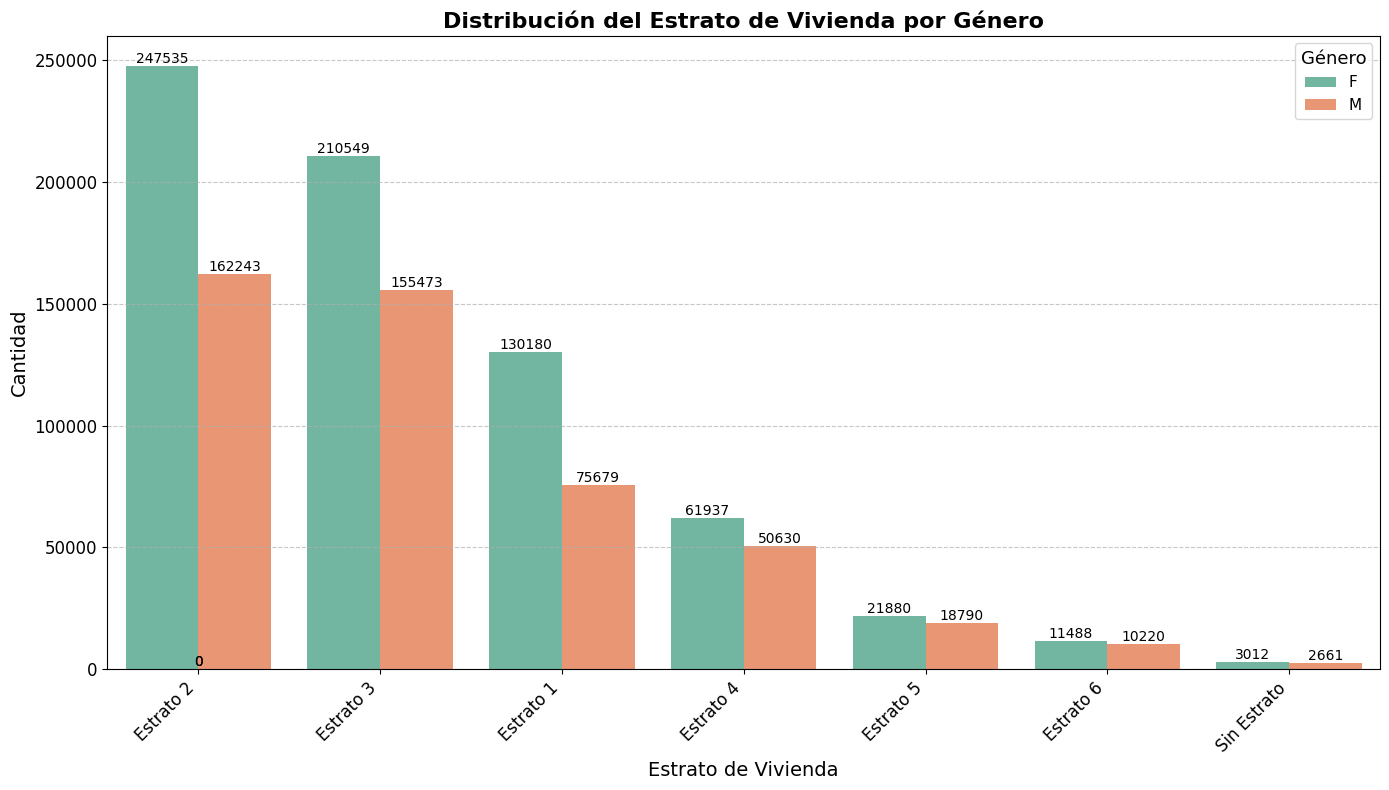

In [8]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='FAMI_ESTRATOVIVIENDA', hue='ESTU_GENERO', palette='Set2')

plt.title('Distribución del Estrato de Vivienda por Género', fontsize=16, weight='bold')
plt.xlabel('Estrato de Vivienda', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar ticks
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agrgear labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,
             p.get_height() + 0.5,
             f'{int(p.get_height())}',
             ha='center', va='bottom', fontsize=10, color='black')

# Leyenda
plt.legend(title='Género', title_fontsize='13', fontsize='11', loc='upper right')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()

plt.show()

1. La cantidad de mujeres (F) es significativamente mayor que la de hombres (M) en todos los estratos de vivienda. El Estrato 2, hay 247,535 mujeres frente a 162,243 hombres.

2. La diferencia entre géneros es más notable en los estratos con mayor población, como el Estrato 2 y Estrato 3. La diferencia disminuye en estratos con menor población.

3. En los estratos más bajos (Estrato 1 y Estrato 2), tanto el número total de personas como la diferencia entre géneros es mayor.

4. En los estratos más altos (Estrato 5 y Estrato 6), el número total de personas es menor, y la diferencia entre géneros también es menos pronunciada.

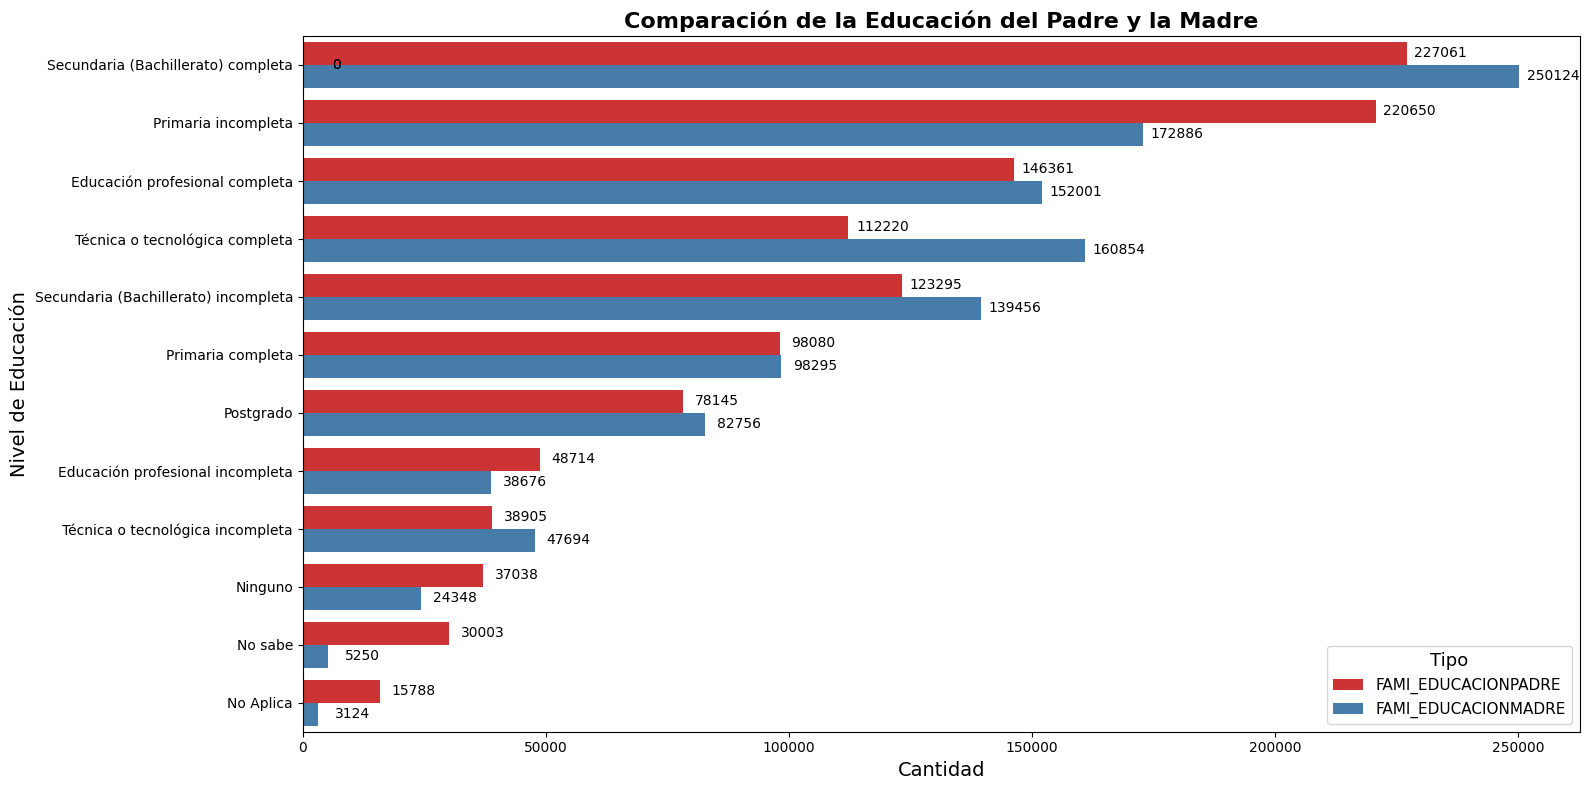

In [9]:
df_comparacion = pd.melt(df[['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']], 
                         value_vars=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], 
                         var_name='Tipo', 
                         value_name='Educacion')


plt.figure(figsize=(16, 8))
sns.countplot(data=df_comparacion, y='Educacion', hue='Tipo', palette='Set1', order=df_comparacion['Educacion'].value_counts().index)

# titulo y labels
plt.title('Comparación de la Educación del Padre y la Madre', fontsize=16, weight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Nivel de Educación', fontsize=14)

# Labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 7000, p.get_y() + p.get_height() / 2, f'{int(width)}', 
             ha='center', va='center', fontsize=10, color='black')

# Leyenda
plt.legend(title='Tipo', title_fontsize='13', fontsize='11', loc='lower right')

# Ajustar el layout
plt.tight_layout()

plt.show()

1. La figura presenta el nivel de formación de los padres de los estudiantes que presentan la prueba Saber Pro. En cuanto al nivel educativo de los padres, se observa que, en su mayoría, los padres tienen la secundaria completa, con un total de 227,061 casos, lo que representa la mayor cantidad comparado con otras categorías. Esto sugiere que la secundaria completa es el nivel educativo más común entre los padres de estos estudiantes. En comparación, las madres también tienen una alta representación con secundaria completa, sumando 250,124 casos, lo que es superior al número de padres con el mismo nivel educativo.

2. Por otro lado, en el nivel de educación primaria incompleta, las madres tienen una mayor representación con 172,886 casos frente a los 220,650 casos de los padres. Esto indica que, aunque los padres también tienen una cantidad considerable en esta categoría, las madres son más numerosas en el grupo con primaria incompleta.

3. La figura mustra que 78,145 padres y 82,756 madres han completado estudios de posgrado, reflejando una alta especialización académica en ambos grupos. Sin embargo, las madres tienen una mayor representación en esta categoría, lo que podría sugerir una tendencia hacia una mayor formación avanzada entre las mujeres en comparación con los hombres. Este hallazgo resalta la importancia de los estudios de posgrado en el perfil educativo de los padres y su posible impacto en el apoyo educativo que proporcionan a sus hijos.

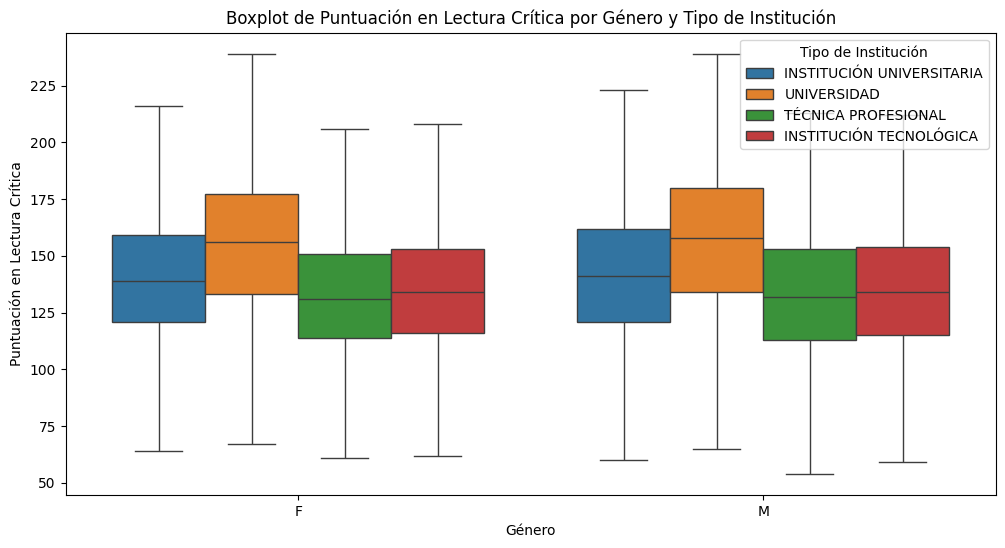

In [10]:
T = pd.DataFrame(df)

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=T, x='ESTU_GENERO', y='MOD_LECTURA_CRITICA_PUNT', hue='INST_CARACTER_ACADEMICO', showfliers=False)
plt.xlabel('Género')
plt.ylabel('Puntuación en Lectura Crítica')
plt.title('Boxplot de Puntuación en Lectura Crítica por Género y Tipo de Institución')
plt.legend(title='Tipo de Institución')
plt.show()

El boxplot revela que, en términos de puntuación en la competencia de lectura crítica, el género femenino obtiene mejores resultados en las instituciones de tipo universidad, alcanzando una media superior a 150 puntos. En contraste, en las instituciones técnicas profesionales, las mujeres presentan una media significativamente más baja. Para el género masculino, los resultados siguen una tendencia similar: en las universidades, la media de las puntuaciones es más alta, mientras que en las instituciones técnicas profesionales, la media es menor en comparación con las universidades y otros tipos de instituciones. Tanto para mujeres como para hombres, el tipo de institución influye en las puntuaciones de lectura crítica, siendo las universidades las que presentan las medias más altas.



In [11]:
conteo_departamentos = df['ESTU_DEPTO_RESIDE'].value_counts()

# Mostrar el conteo de cada departamento
print(conteo_departamentos)


ESTU_DEPTO_RESIDE
BOGOTÁ               326784
ANTIOQUIA            146234
VALLE                 95745
CUNDINAMARCA          76074
ATLANTICO             69830
SANTANDER             58419
BOLIVAR               39027
NORTE SANTANDER       36487
BOYACA                32657
TOLIMA                31600
NARIÑO                30594
CORDOBA               28960
HUILA                 26578
RISARALDA             24770
META                  24335
CAUCA                 23465
CALDAS                23130
CESAR                 21919
MAGDALENA             19519
SUCRE                 16017
QUINDIO               13738
LA GUAJIRA            12684
CHOCO                  8892
CASANARE               7786
CAQUETA                6881
PUTUMAYO               4926
ARAUCA                 3538
GUAVIARE                963
SAN ANDRES              922
EXTRANJERO              461
AMAZONAS                356
VICHADA                 351
VAUPES                  243
GUAINIA                 184
FRANKFURT                 2
MI

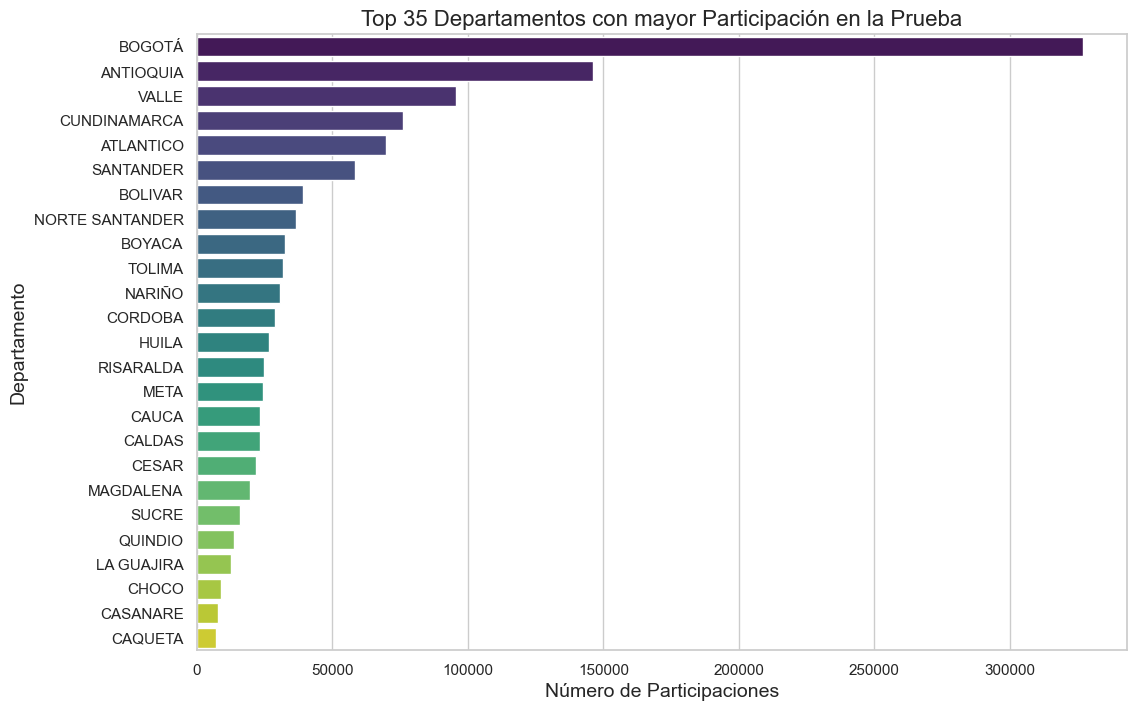

In [12]:
conteo_departamentos = df['ESTU_DEPTO_RESIDE'].value_counts()

# Obtener los 15 departamentos con más participación
top_25_departamentos = conteo_departamentos.head(25)

# Crear un DataFrame para facilitar la graficación
top_15_df = top_25_departamentos.reset_index()
top_15_df.columns = ['Departamento', 'Participaciones']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Participaciones', y='Departamento', data=top_15_df, palette='viridis')
plt.title('Top 35 Departamentos con mayor Participación en la Prueba', fontsize=16)
plt.xlabel('Número de Participaciones', fontsize=14)
plt.ylabel('Departamento', fontsize=14)
plt.show()

La gráfica muestra que la mayor concentración de universitarios que presentan la prueba se encuentra en la ciudad capital, Bogotá, con un total de 326,784 estudiantes. A continuación, los departamentos con mayores concentraciones incluyen Antioquia, con 146,234 estudiantes; Valle, con 95,745; Cundinamarca, con 76,074; Atlántico, con 69,830; Santander, con 58,419; y Bolívar, con 39,027, entre otros. En contraste, La Guajira ocupa el puesto 22 con 12,684 estudiantes, mostrando una representación considerablemente menor en comparación con las regiones mencionadas anteriormente.



# **Actividad III.**

**Preguntas o hipótesis de interés sobre el dataset**

Pregunta: ¿Existe una relación entre el nivel educativo de los padres (FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE) y el desempeño en MOD_LECTURA_CRITICA_PUNT para los estudiantes del departamento de La Guajira?

Hipótesis 1: Los estudiantes del departamento de La Guajira cuyos padres tienen un nivel educativo más alto (FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE) obtienen puntuaciones significativamente mejores en MOD_LECTURA_CRITICA_PUNT en comparación con los estudiantes cuyos padres tienen un nivel educativo más bajo.

Pregunta: ¿Cómo influyen las variables económicas y sociales, como el valor de la matrícula universitaria, el tipo de pago de matrícula (beca o crédito), la educación de los padres, y la disponibilidad de recursos en el hogar (automóvil, lavadora, estrato de vivienda, computador e internet), en los resultados de las pruebas académicas, incluyendo la puntuación en razonamiento cuantitativo, comunicación escrita, inglés, lectura crítica, y competencia ciudadana?

Hipótesis 2 : Los aspectos económicos y sociales, como el valor de la matrícula universitaria, el tipo de pago de la matrícula (beca o crédito), la educación de los padres, y la disponibilidad de recursos en el hogar (automóvil, lavadora, estrato de vivienda, computador e internet), tienen un impacto significativo en los resultados de las pruebas académicas.

Pregunta: ¿Cómo afecta la cantidad de horas trabajadas (ESTU_HORASSEMANATRABAJA) al rendimiento en pruebas de comunicación escrita (MOD_COMUNI_ESCRITA_PUNT) para los estudiantes de La Guajira?

Hipótesis 3: Hay una relación inversa entre el número de horas trabajadas semanalmente y el rendimiento en MOD_COMUNI_ESCRITA_PUNT para los estudiantes de La Guajira.

¿Por qué los puntajes de los estudiantes de La Guajira en las competencias de lectura crítica y razonamiento cuantitativo son menores en comparación con los puntajes de estudiantes de otros departamentos de Colombia?

Hipótesis 4: La gestión del tiempo de estudio (incluyendo la cantidad y calidad del tiempo dedicado al estudio) afecta de manera significativa los resultados en las competencias de lectura crítica y razonamiento cuantitativo, y esta influencia contribuye a la diferencia en los puntajes de los estudiantes de La Guajira en comparación con los de otros departamentos de Colombia.

Pregunta: ¿Cuál es la relación entre MOD_COMPETEN_CIUDADA_PUNT y las variables de datos demográficos como ESTU_GENERO entre los estudiantes del departamento de La Guajira?

Hipótesis 5: Hay diferencias en MOD_COMPETEN_CIUDADA_PUNT según el género del estudiante en La Guajira, con ciertos géneros mostrando puntuaciones más altas.

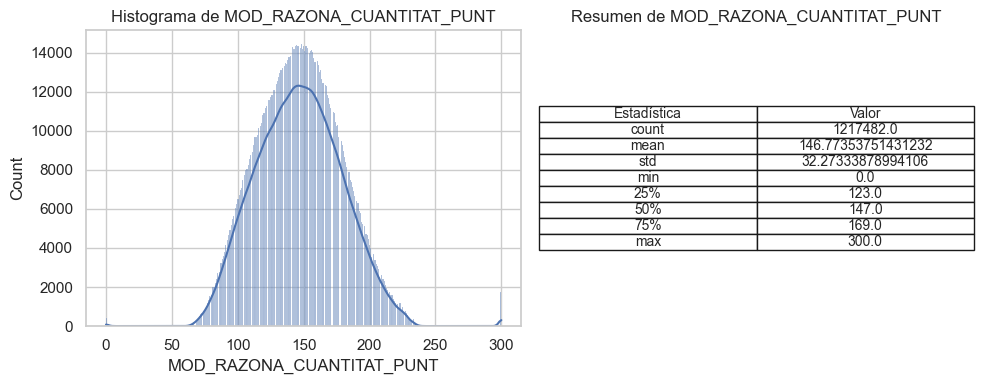

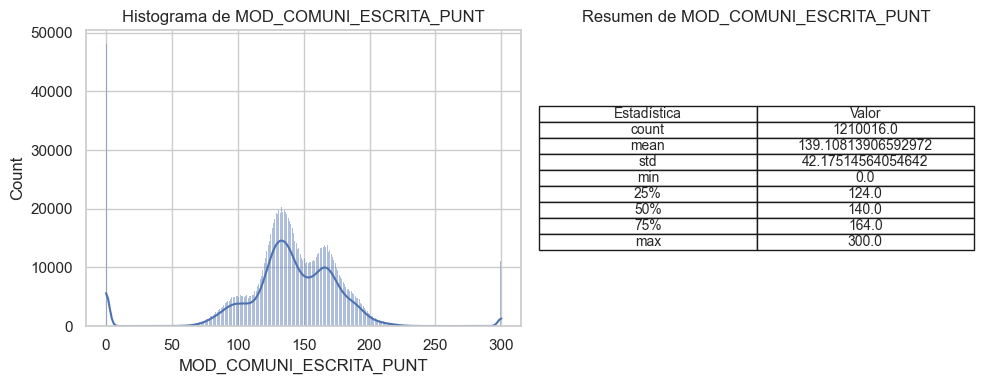

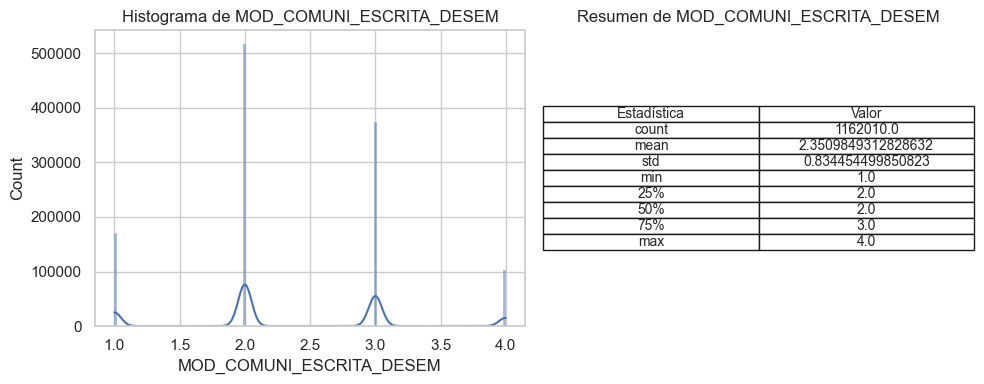

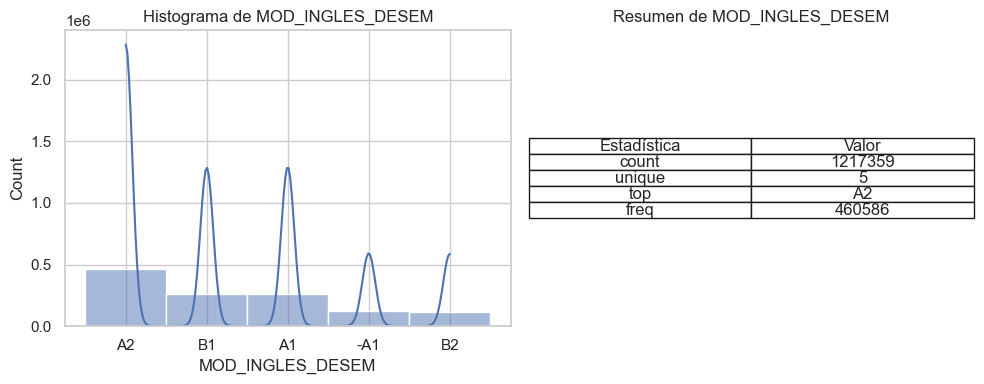

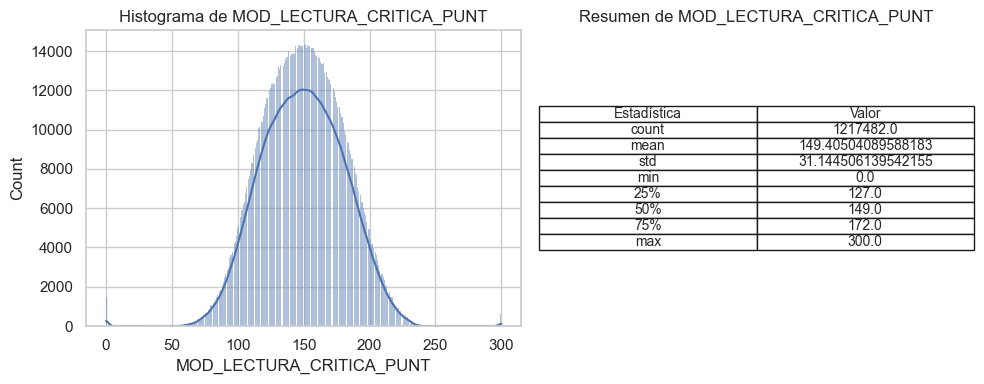

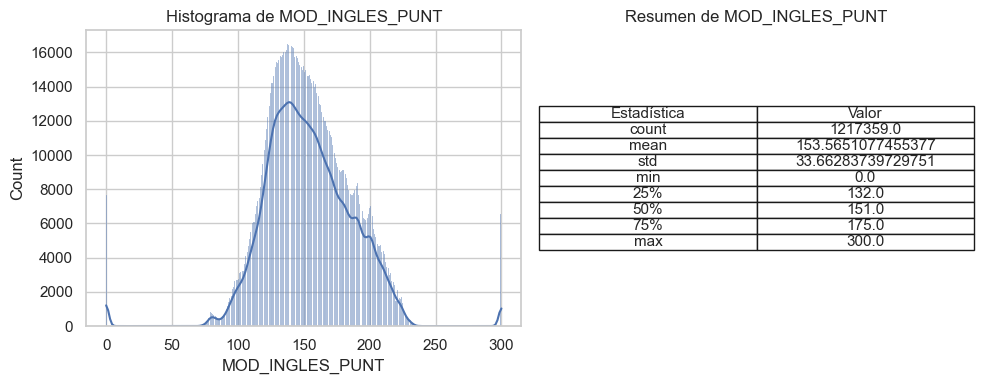

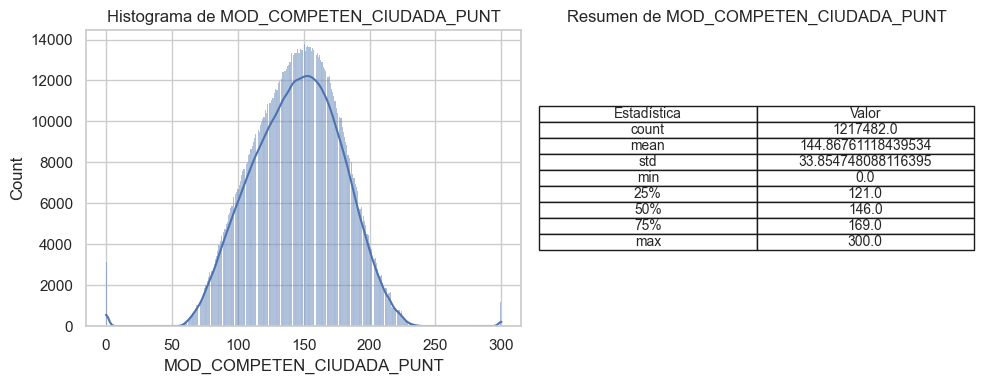

In [13]:
# Crear histogramas y resúmenes numéricos
for var in variables_cuantitativas:
    plt.figure(figsize=(10, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    # Resumen numérico
    plt.subplot(1, 2, 2)
    plt.table(cellText=df[var].describe().reset_index().values, 
              colLabels=['Estadística', 'Valor'], 
              cellLoc='center', 
              loc='center')
    plt.axis('off')
    plt.title(f'Resumen de {var}')
    
    plt.tight_layout()
    plt.show()

La gráfica presenta los resultados de todas las competencias genéricas evaluadas en la prueba Saber Pro. Se observa que las distribuciones de 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', y 'MOD_COMPETEN_CIUDADA_PUNT' siguen una distribución normal, con una mayor frecuencia alrededor de 150, que representa la media para estas pruebas. 

En cuanto al desempeño en 'MOD_COMUNI_ESCRITA_DESEM', la mayoría de los resultados se concentran en el nivel 2, con un desempeño que llega hasta 4. En 'MOD_INGLES_DESEM', el nivel más frecuente es A2, mientras que los niveles BA y A1 tienen una frecuencia similar.

2. Visualización Bivariada


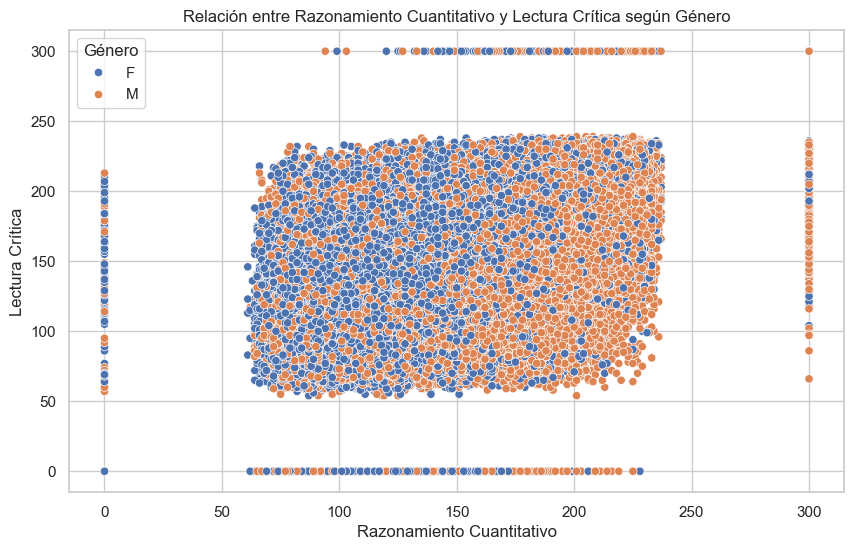

In [14]:
# Gráfico de dispersión entre MOD_RAZONA_CUANTITAT_PUNT y MOD_LECTURA_CRITICA_PUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MOD_RAZONA_CUANTITAT_PUNT', y='MOD_LECTURA_CRITICA_PUNT', hue='ESTU_GENERO')
plt.title('Relación entre Razonamiento Cuantitativo y Lectura Crítica según Género')
plt.xlabel('Razonamiento Cuantitativo')
plt.ylabel('Lectura Crítica')
plt.legend(title='Género')
plt.show()


Las figuras muestran que, en las pruebas de lectura crítica y razonamiento cuantitativo, los hombres obtienen puntuaciones superiores en comparación con las mujeres. En la prueba de lectura crítica, los hombres se destacan con puntuaciones perfectas de 300, mientras que las mujeres tienden a obtener los puntajes más bajos. En cuanto al razonamiento cuantitativo, los hombres también sobresalen en los mejores resultados. En la distribución de frecuencias, el color naranja, que representa al sexo masculino, indica una mayor frecuencia de puntajes superiores a 170. Sin embargo, en la línea correspondiente al puntaje perfecto de 300, se observa una mayor cantidad de valores atípicos entre las mujeres, es decir, puntuaciones perfectas, aunque estas son menos frecuentes que los puntajes altos obtenidos por los hombres.





1. Variables Cuantitativas- Resultados pruebas (7):
MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT, MOD_COMUNI_ESCRITA_DESEM, MOD_INGLES_DESEM, MOD_LECTURA_CRITICA_PUNT, MOD_INGLES_PUNT, MOD_COMPETEN_CIUDADA_PUNT

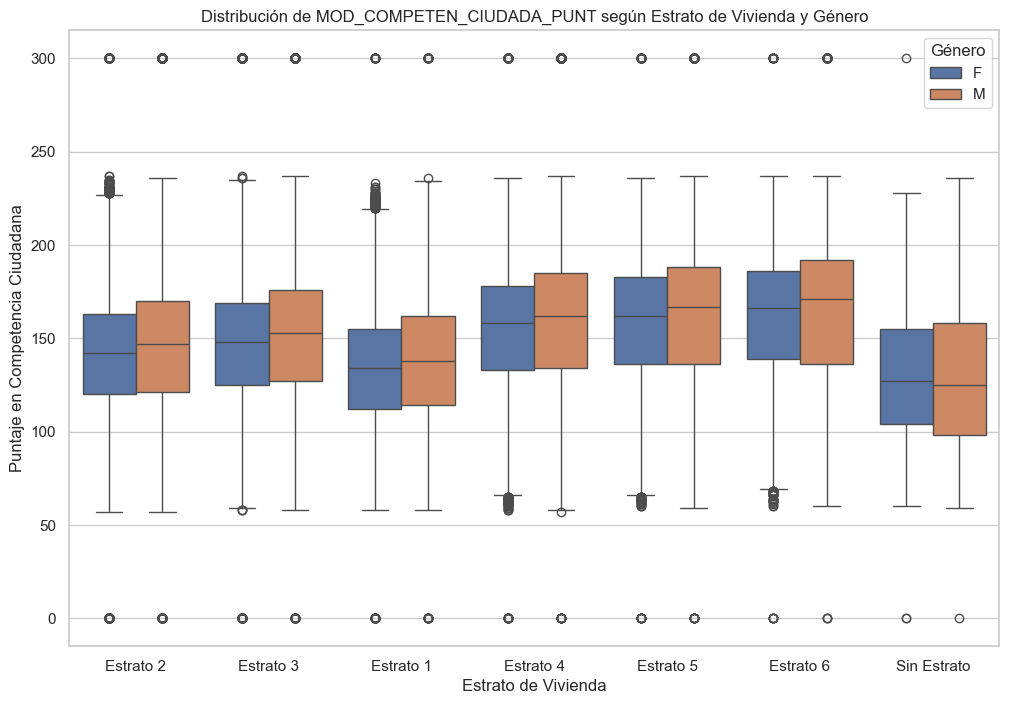

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='FAMI_ESTRATOVIVIENDA', y='MOD_COMPETEN_CIUDADA_PUNT', hue='ESTU_GENERO')
plt.title('Distribución de MOD_COMPETEN_CIUDADA_PUNT según Estrato de Vivienda y Género')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Puntaje en Competencia Ciudadana')
plt.legend(title='Género')
plt.show()

Se encontró que, al analizar los puntajes en competencias ciudadanas por estratos, el estrato 6 muestra los mejores resultados, destacándose por una mediana más alta y con un rendimiento superior del sexo masculino en comparación con el sexo femenino. A continuación, se observan mejores resultados en el estrato 5, seguido por el estrato 4 y el estrato 3. Por otro lado, los estudiantes del estrato 1 presentan puntajes significativamente inferiores en comparación con los de los demás estratos. En todos los casos existen casos atipicos, que representa que el maximo resultado.





# **Actividad IV- Estructurando proyecto DS II.**


1.Abstracto con motivaciÓn y audiencia

2.Preguntas/Hipotesis que queremos resolver mediante el an´alisis de datos

3.Analisis Exploratorio de Datos (EDA)

4.Con base en las visualizaciones y resumenes numericos generados del desafıo
anterior dar recomendaciones basados en los insights observados.

5.Para esta oportunidad se deberan tener avances en los apartados: Definicion
de objetivo, Contexto comercial, Problema Comercial, Contexto anal´ıtico,
Exploracion de datos (EDA)

Deadline: 26 Ago 2024

1. Abstracto con Motivación y Audiencia

Abstracto:
El análisis de factores económicos, sociales y demográficos es crucial para comprender las variaciones en el desempeño académico en las pruebas SABER-PRO de los estudiantes de La Guajira, Colombia. La Prueba Saber Pro evalúa competencias esenciales en áreas como razonamiento crítico, comunicación escrita, y habilidades en inglés, entre otras. Este estudio busca identificar cómo diversas variables influyen en los resultados de estas pruebas, con el fin de proporcionar información valiosa para la mejora de políticas educativas y estrategias institucionales. 

Motivación:El desempeño académico de los estudiantes de La Guajira en las pruebas SABER-PRO puede estar significativamente afectado por factores económicos, sociales y demográficos. Comprender estas influencias es esencial para diseñar intervenciones que aborden desigualdades y optimicen el rendimiento académico. Este análisis permitirá a las instituciones educativas adaptar sus estrategias para mejorar el apoyo a los estudiantes, especialmente en contextos socioeconómicos desfavorecidos.

Audiencia: Instituciones de educación superior en el departamento de La Guajira.

2. Preguntas/Hipótesis que Queremos Resolver Mediante el Análisis de Datos

Preguntas:

1. ¿Cómo influyen las variables económicas (como el valor de la matrícula y los recursos disponibles en el hogar) en el desempeño de los estudiantes en las pruebas SABER-PRO?
2. ¿Qué impacto tienen los aspectos sociales (como el nivel educativo de los padres y el acceso a tecnología) en los resultados de las pruebas?
3. ¿Existen diferencias significativas en el desempeño académico según las variables demográficas como género, lugar de residencia y nacionalidad?
4. ¿Cómo afecta el contexto académico (tipo de institución, programa académico, y nivel del programa) en el rendimiento en las pruebas?

Hipótesis:

1. Los estudiantes con acceso a recursos económicos y tecnológicos adecuados obtendrán mejores resultados en las pruebas SABER-PRO.
2. El nivel educativo de los padres influye positivamente en el desempeño académico de los estudiantes.
3. Los estudiantes que residen en áreas urbanas tendrán un mejor desempeño en comparación con aquellos de áreas rurales.
4. Los estudiantes matriculados en instituciones privadas y en programas académicos con métodos de enseñanza modernos obtendrán mejores resultados.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217482 entries, 0 to 1217481
Data columns (total 57 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   PERIODO                         1217482 non-null  int64  
 1   ESTU_CONSECUTIVO                1217482 non-null  object 
 2   ESTU_TIPODOCUMENTO              1217482 non-null  object 
 3   ESTU_PAIS_RESIDE                1217482 non-null  object 
 4   ESTU_COD_RESIDE_DEPTO           1214089 non-null  float64
 5   ESTU_DEPTO_RESIDE               1214089 non-null  object 
 6   ESTU_COD_RESIDE_MCPIO           1214089 non-null  float64
 7   ESTU_MCPIO_RESIDE               1214089 non-null  object 
 8   ESTU_CODDANE_COLE_TERMINO       817440 non-null   float64
 9   ESTU_COD_COLE_MCPIO_TERMINO     817440 non-null   float64
 10  ESTU_COD_DEPTO_PRESENTACION     1217378 non-null  float64
 11  INST_COD_INSTITUCION            1217482 non-null  int64  
 12  

3. Análisis Exploratorio de Datos (EDA)

Descripción:

El Análisis Exploratorio de Datos (EDA) se centrará en examinar la distribución y relación entre las variables seleccionadas. Se utilizarán técnicas estadísticas descriptivas y visualizaciones para identificar patrones, tendencias y anomalías en los datos. Las etapas del EDA incluyen:

- Distribución de Variables Cuantitativas:**
  - Análisis de la media, mediana, desviación estándar y rangos intercuartílicos para las puntuaciones en las pruebas SABER-PRO.
  - Identificación de correlaciones entre diferentes áreas de evaluación (por ejemplo, entre MOD_RAZONA_CUANTITAT_PUNT y MOD_LECTURA_CRITICA_PUNT).

- Datos Demográficos:
  - Análisis de la distribución geográfica y demográfica de los estudiantes (por ejemplo, comparación de desempeño entre diferentes municipios y departamentos).
  - Análisis de diferencias en rendimiento por género y nacionalidad.

- Información Académica:
  - Evaluación del impacto del tipo de institución, programa académico y nivel del programa en los resultados de las pruebas.
  - Comparación de desempeño entre diferentes métodos de enseñanza.

- Aspectos Económicos y Sociales:
  - Análisis del impacto del valor de matrícula y acceso a recursos en el desempeño académico.
  - Evaluación del efecto del nivel educativo de los padres y la disponibilidad de tecnología en el rendimiento.

- **Trabajo y Gestión del Tiempo:**
  - Análisis de la relación entre las horas trabajadas semanalmente y el rendimiento en las pruebas.

**Visualizaciones:**

- Histogramas y diagramas de caja para variables cuantitativas.
- Gráficos de barras y mapas para variables geográficas.
- Diagramas de dispersión para evaluar correlaciones entre variables.
- Gráficos de barras apiladas para aspectos económicos y sociales.


# **A nivel Colombia.**

In [17]:
# Variables Cuantitativas
cuantitativas = [
    'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM',
    'MOD_INGLES_DESEM', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT'
]

# Datos Demográficos
demograficos = [
    'ESTU_DEPTO_RESIDE', 'ESTU_GENERO'
]

# Información Académica
academica = [
    'INST_CARACTER_ACADEMICO',  'ESTU_INST_DEPARTAMENTO', 
    'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM'
]

# Aspectos Económicos y Sociales
economicos_sociales = [
    'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
    'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEAUTOMOVIL', 
    'FAMI_TIENELAVADORA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET'
]

# Trabajo y Gestión del Tiempo
trabajo_tiempo = ['ESTU_HORASSEMANATRABAJA']

# **A nivel colombia .**

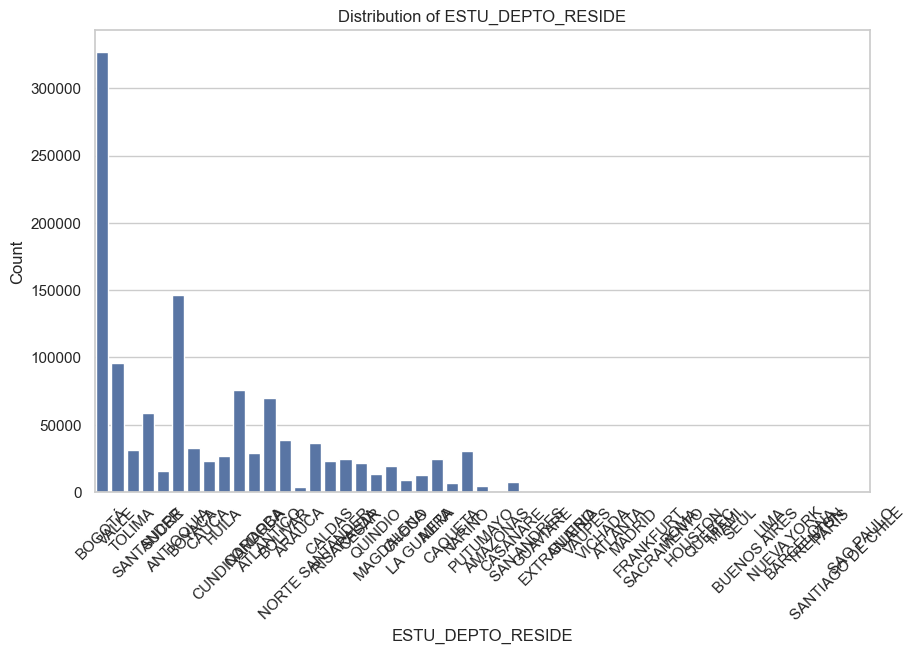

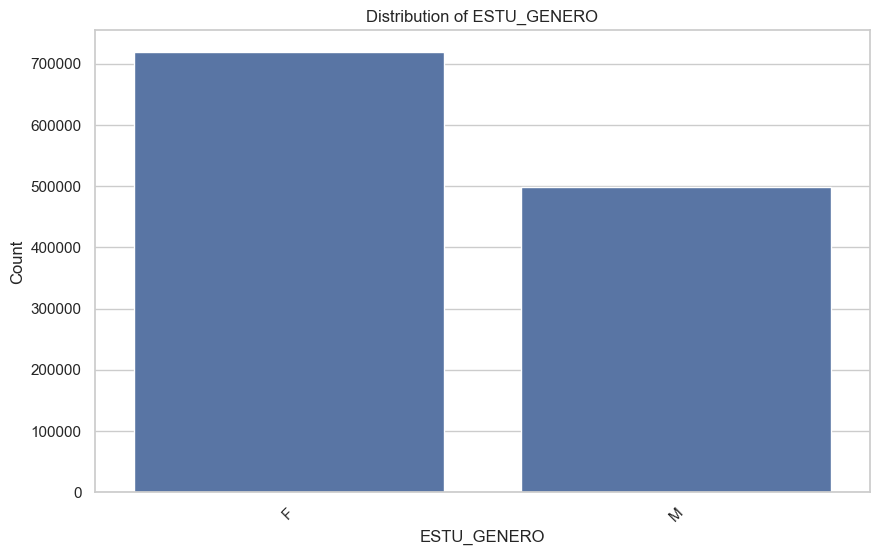

In [18]:
# Datos Demográficos
def eda_demograficos(df, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=var)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
eda_demograficos(df, demograficos)

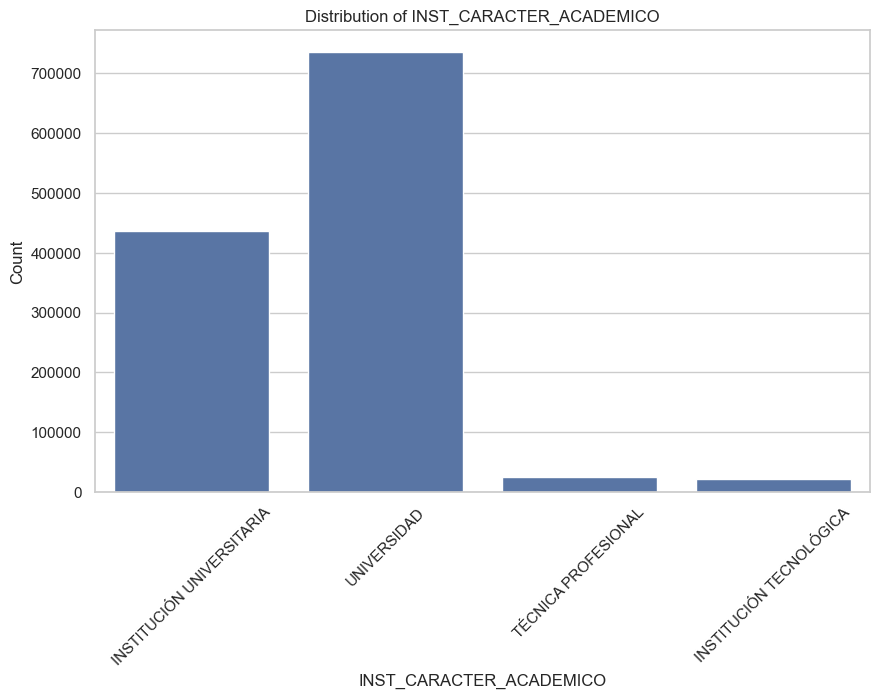

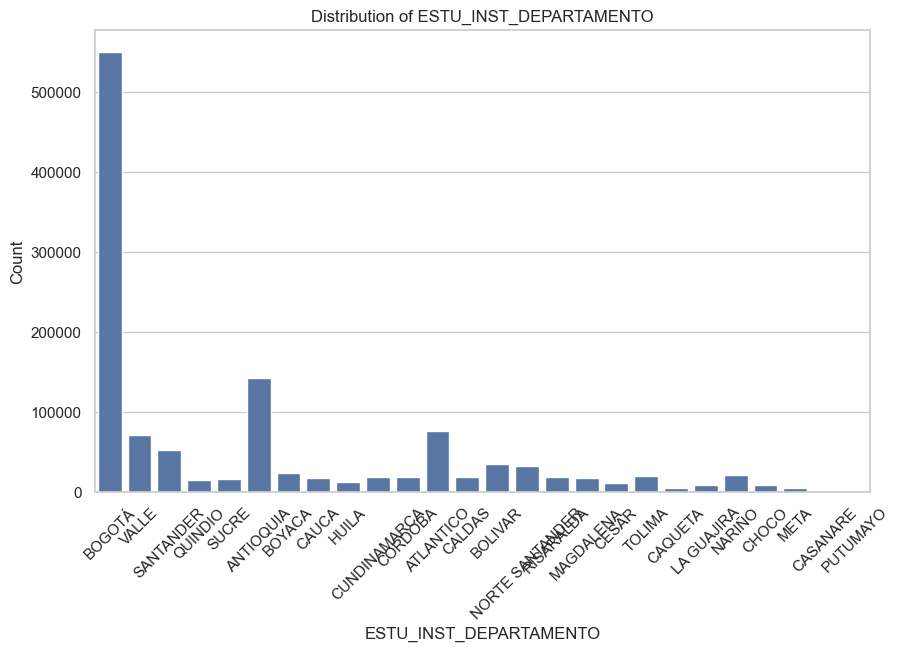

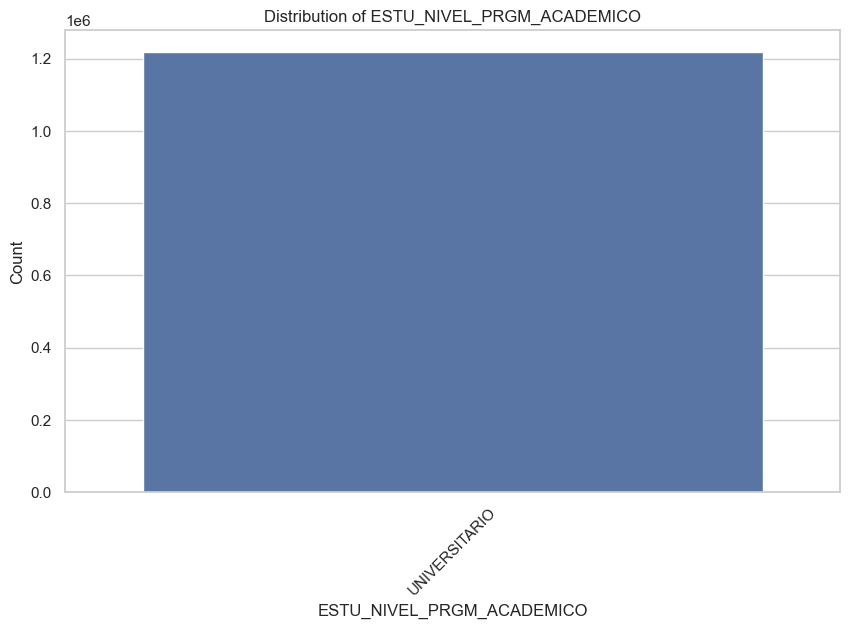

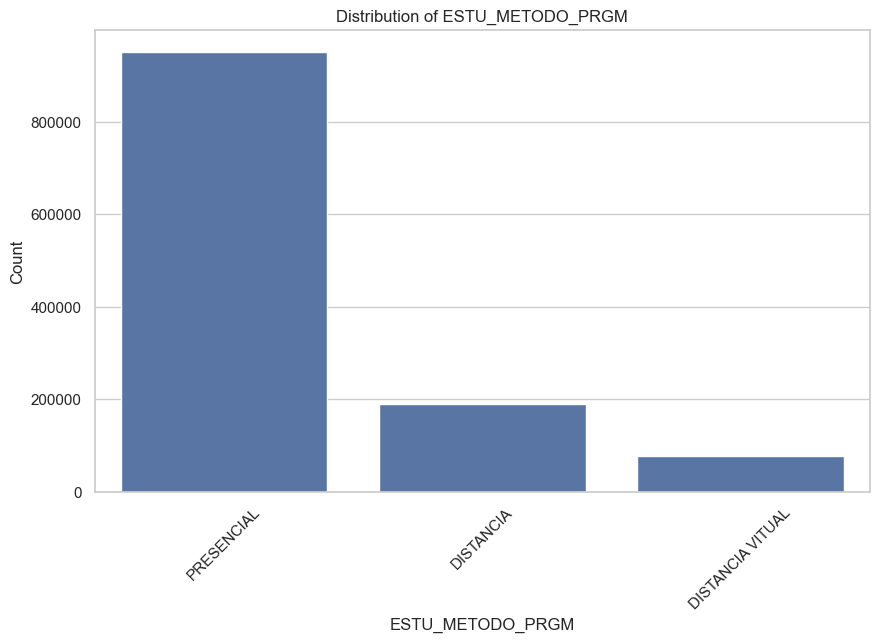

In [19]:
# Información Académica
def eda_academica(df, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=var)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
eda_academica(df, academica)

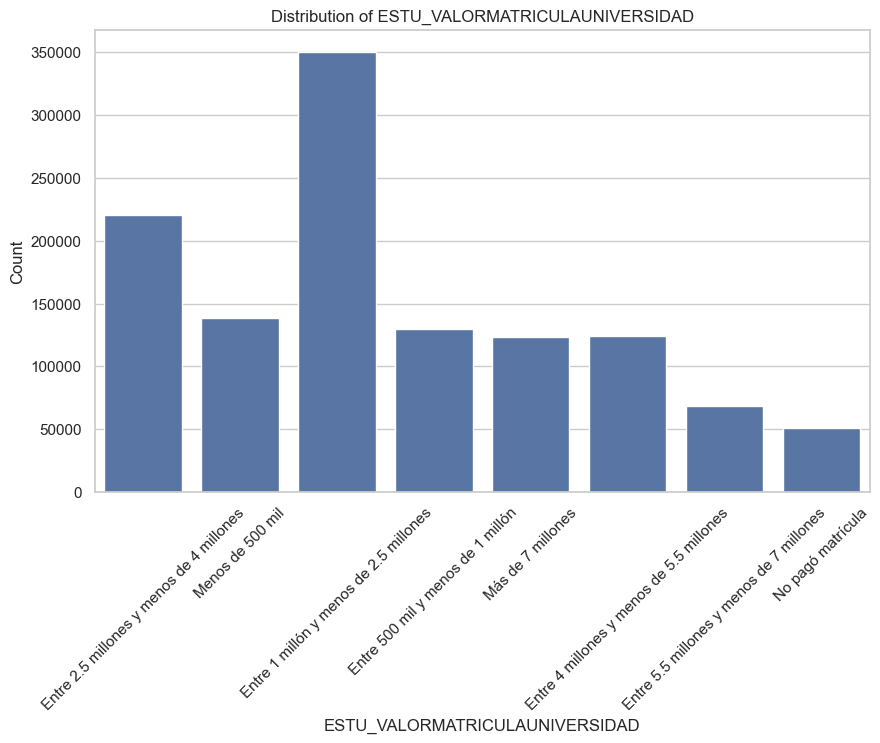

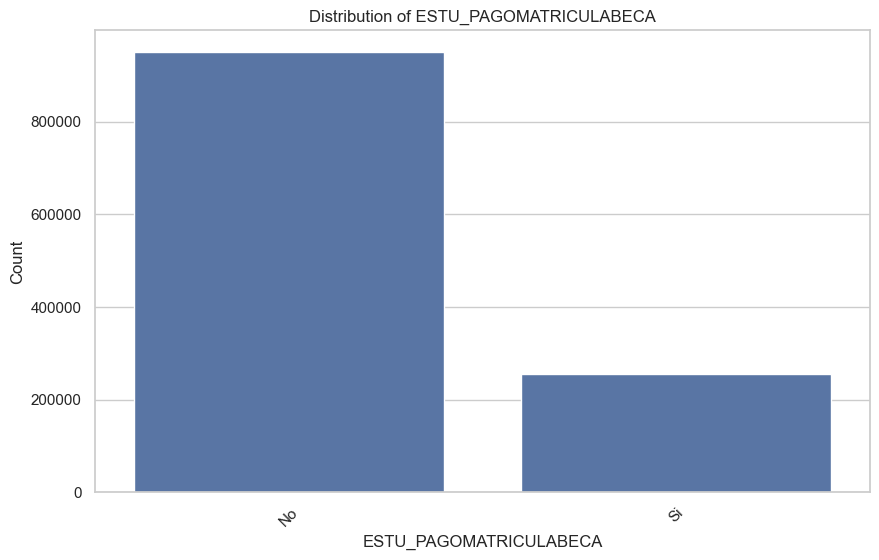

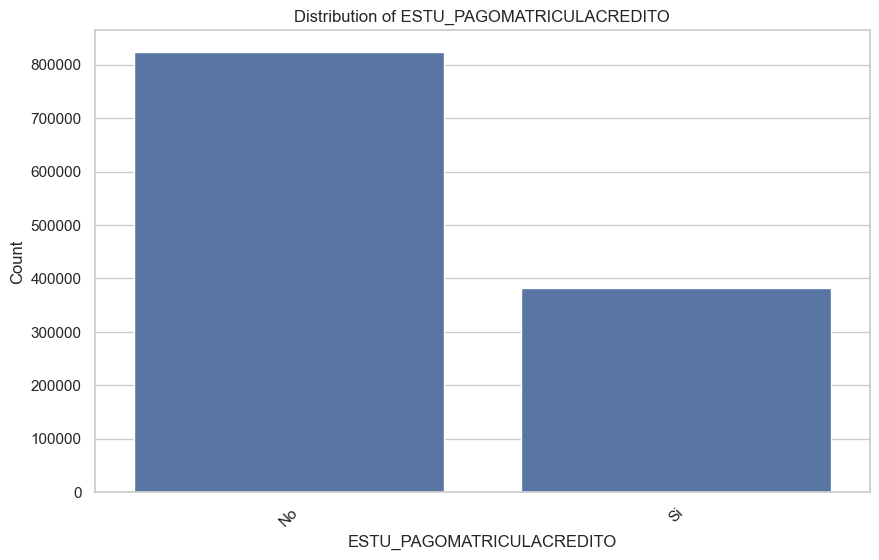

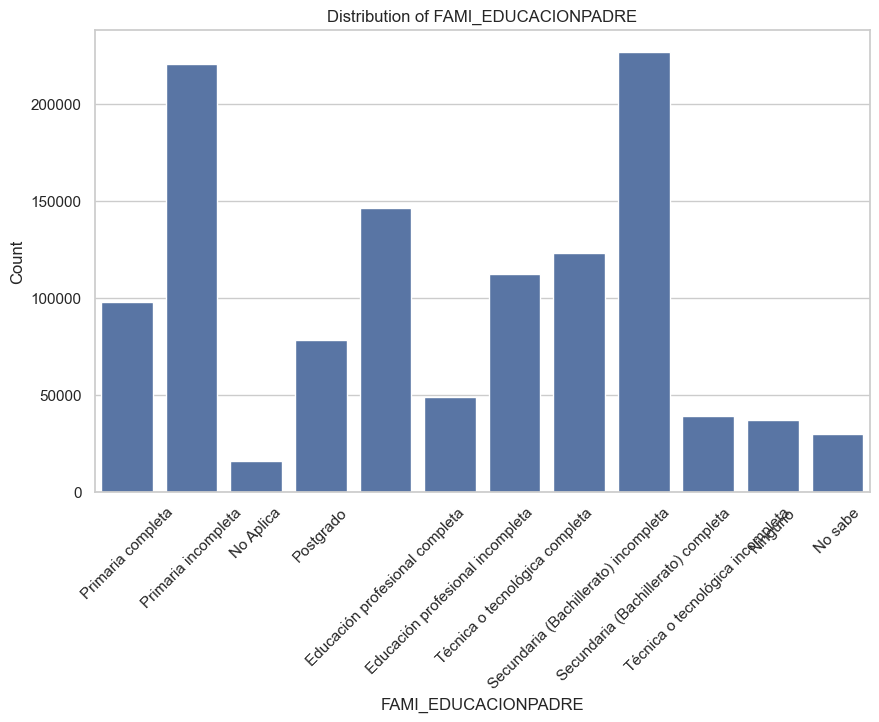

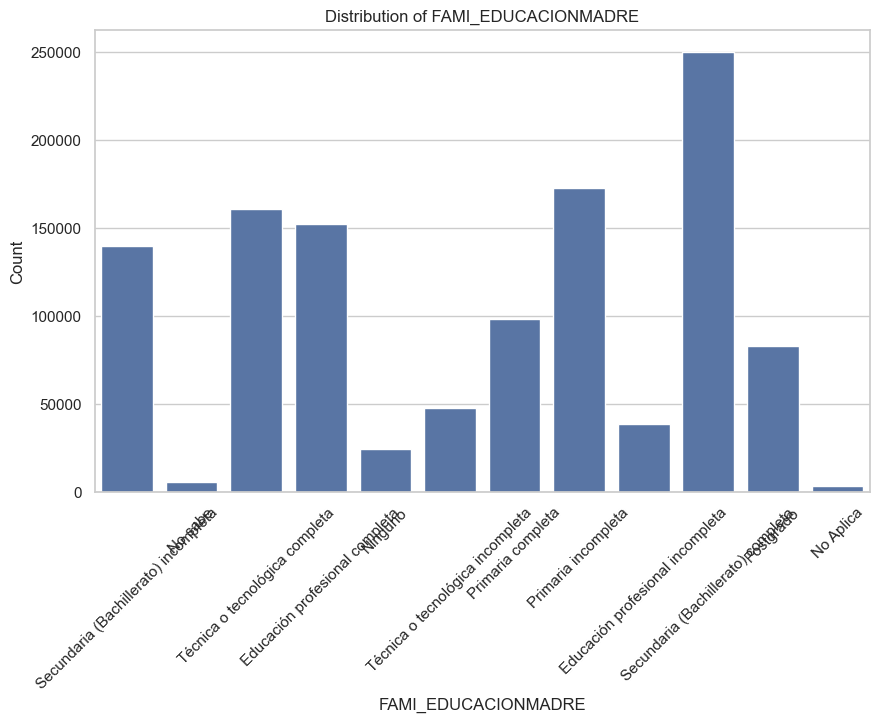

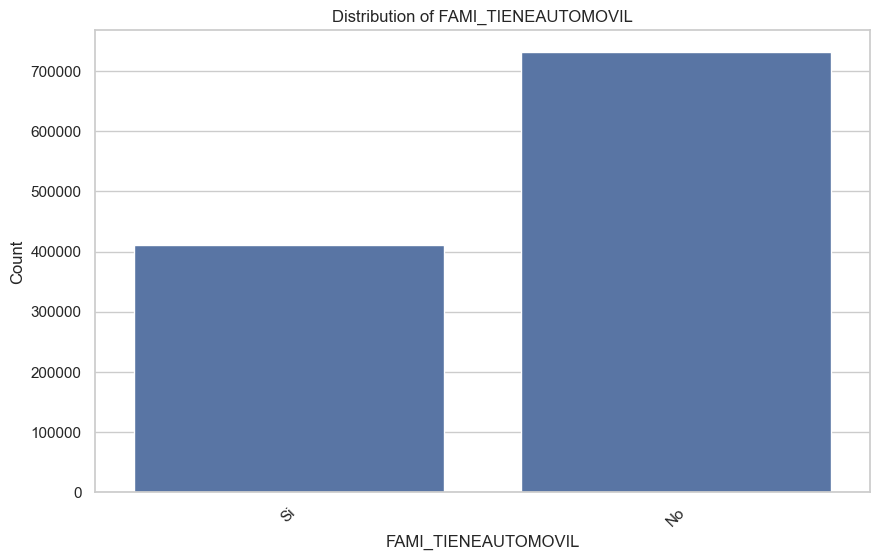

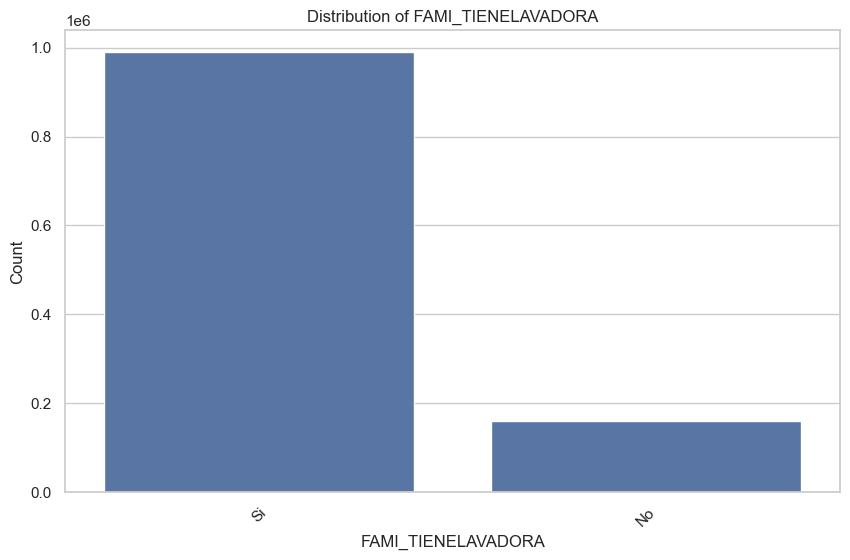

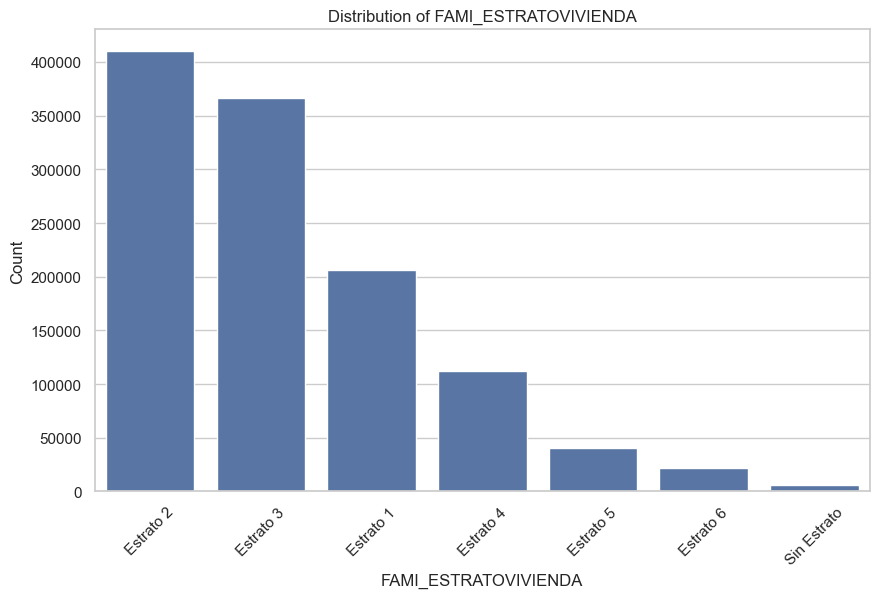

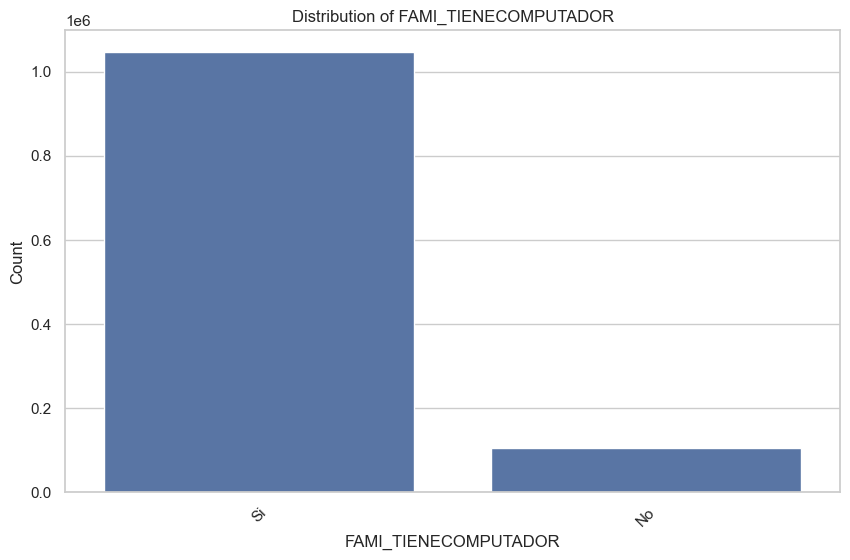

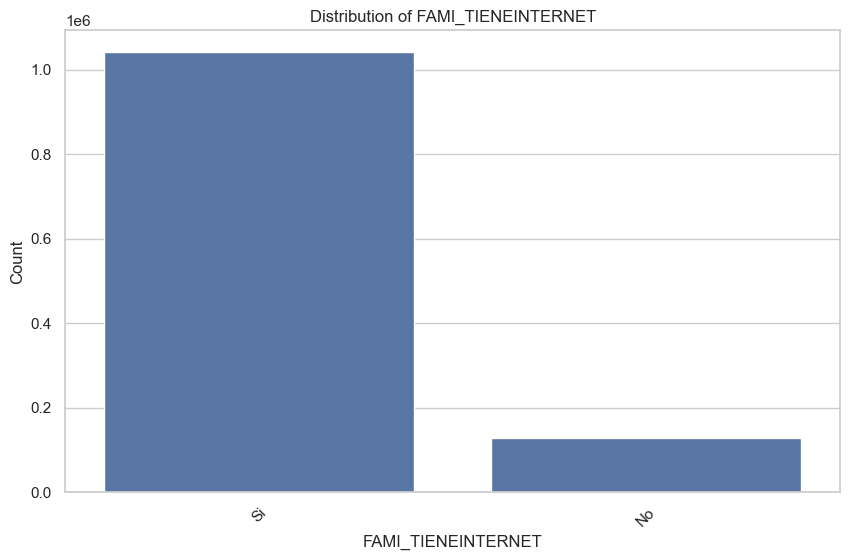

In [20]:
# Aspectos Económicos y Sociales
def eda_economicos_sociales(df, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        if df[var].dtype in ['float64', 'int64']:
            sns.histplot(df[var].dropna(), kde=True)
            plt.title(f'Distribution of {var}')
            plt.xlabel(var)
            plt.ylabel('Frequency')
        else:
            sns.countplot(data=df, x=var)
            plt.title(f'Distribution of {var}')
            plt.xlabel(var)
            plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
eda_economicos_sociales(df, economicos_sociales)

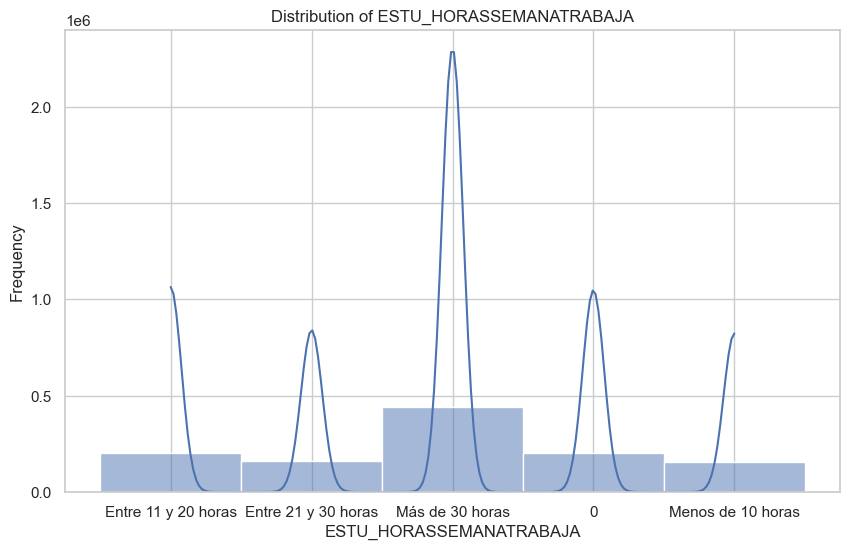

In [21]:
# Trabajo y Gestión del Tiempo
def eda_trabajo_tiempo(df, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[var].dropna(), kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()
eda_trabajo_tiempo(df, trabajo_tiempo)

EDA A nivel Colombia:

Aspectos Económicos y Sociales:

El estrato socioeconómico predominante entre los estudiantes es el estrato 2, seguido por el estrato 3 y, en tercer lugar, el estrato 1.
Más de 700,000 estudiantes no tienen carro, aunque la mayoría cuenta con computador.
En cuanto al acceso a internet, más de 1.0 familias tienen internet en comparación con menos de 0.2 familias que no lo tienen.

Aspectos Demográficos:

Bogotá es el municipio con mayor participación en la prueba.
Las mujeres representan la mayor parte de los estudiantes a nivel nacional, con más de 700,000, frente a 500,000 hombres.
Información Académica:

Las instituciones de educación superior destacan en la prueba, con una mayor participación en los programas presenciales, seguidos por los de modalidad a distancia.

Nivel de Formación de los Padres:

La mayoría de los padres de los estudiantes tienen la secundaria completa, con 227,061 casos, mientras que las madres presentan una mayor representación con 250,124 casos en secundaria completa.
En cuanto a la educación primaria incompleta, las madres son más numerosas con 172,886 casos en comparación con 220,650 casos de los padres.
Los estudios de posgrado son completados por 78,145 padres y 82,756 madres, indicando una mayor representación femenina en esta categoría.

Distribución por Estratos y Género:

La cantidad de mujeres es significativamente mayor que la de hombres en todos los estratos de vivienda. En el Estrato 2, hay 247,535 mujeres frente a 162,243 hombres.
La diferencia entre géneros es más notable en los estratos con mayor población, como el Estrato 2 y Estrato 3, y disminuye en estratos con menor población.
En los estratos más bajos (Estrato 1 y Estrato 2), la diferencia entre géneros es más pronunciada, mientras que en los estratos más altos (Estrato 5 y Estrato 6), el número total de personas y la diferencia entre géneros son menores.

Tiempo de Trabajo de los Estudiantes:

A nivel nacional en Colombia, la mayor frecuencia de trabajo entre los estudiantes es de más de 30 horas semanales. Le siguen los estudiantes que no trabajan en absoluto, dedicándose completamente a sus estudios, y, finalmente, aquellos que trabajan entre 11 y 20 horas semanales.

# **A nivel La Guajira.**

In [22]:
departamento_interes = 'La Guajira'

conteo_departamentos = df['ESTU_DEPTO_RESIDE'].value_counts()

cantidad_laguajira = conteo_departamentos.get(departamento_interes, 0)

otros_departamentos = conteo_departamentos.drop(departamento_interes, errors='ignore')

print('\nCantidad de estudiantes en otros departamentos:')
for departamento, cantidad in otros_departamentos.items():
    print(f'{departamento}: {cantidad}')

# Total de estudiantes en otros departamentos
total_otros_departamentos = otros_departamentos.sum()
print(f'\nTotal de estudiantes en otros departamentos: {total_otros_departamentos}')



Cantidad de estudiantes en otros departamentos:
BOGOTÁ: 326784
ANTIOQUIA: 146234
VALLE: 95745
CUNDINAMARCA: 76074
ATLANTICO: 69830
SANTANDER: 58419
BOLIVAR: 39027
NORTE SANTANDER: 36487
BOYACA: 32657
TOLIMA: 31600
NARIÑO: 30594
CORDOBA: 28960
HUILA: 26578
RISARALDA: 24770
META: 24335
CAUCA: 23465
CALDAS: 23130
CESAR: 21919
MAGDALENA: 19519
SUCRE: 16017
QUINDIO: 13738
LA GUAJIRA: 12684
CHOCO: 8892
CASANARE: 7786
CAQUETA: 6881
PUTUMAYO: 4926
ARAUCA: 3538
GUAVIARE: 963
SAN ANDRES: 922
EXTRANJERO: 461
AMAZONAS: 356
VICHADA: 351
VAUPES: 243
GUAINIA: 184
FRANKFURT: 2
MIAMI: 2
ROMA: 2
ATLANTA: 1
MADRID: 1
SACRAMENTO: 1
HOUSTON: 1
QUEBEC: 1
SEUL: 1
BUENOS AIRES: 1
LIMA: 1
NUEVA YORK: 1
BARCELONA: 1
TRENTON: 1
PARIS: 1
SANTIAGO DE CHILE: 1
SAO PAULO: 1

Total de estudiantes en otros departamentos: 1214089


In [24]:
df_laguajira = df[df['ESTU_DEPTO_RESIDE'] == 'LA GUAJIRA']

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(df_laguajira.head())

# Mostrar la cantidad total de filas y columnas para verificar
print(f'Total filas: {df_laguajira.shape[0]}')
print(f'Total columnas: {df_laguajira.shape[1]}')

# Opcional: Guardar el DataFrame filtrado en un nuevo archivo CSV
df_laguajira.to_csv('laguajira_dataset.csv', index=False)

     PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
126    20183   EK201830242464                 CC         COLOMBIA   
166    20183   EK201830171760                 CC         COLOMBIA   
247    20183   EK201830024038                 CC         COLOMBIA   
257    20183   EK201830141464                 CC         COLOMBIA   
258    20183   EK201830046456                 CC         COLOMBIA   

     ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
126                   44.0        LA GUAJIRA                44430.0   
166                   44.0        LA GUAJIRA                44279.0   
247                   44.0        LA GUAJIRA                44874.0   
257                   44.0        LA GUAJIRA                44430.0   
258                   44.0        LA GUAJIRA                44874.0   

    ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  ESTU_COD_COLE_MCPIO_TERMINO  \
126            MAICAO               1.444300e+11                      44430.0

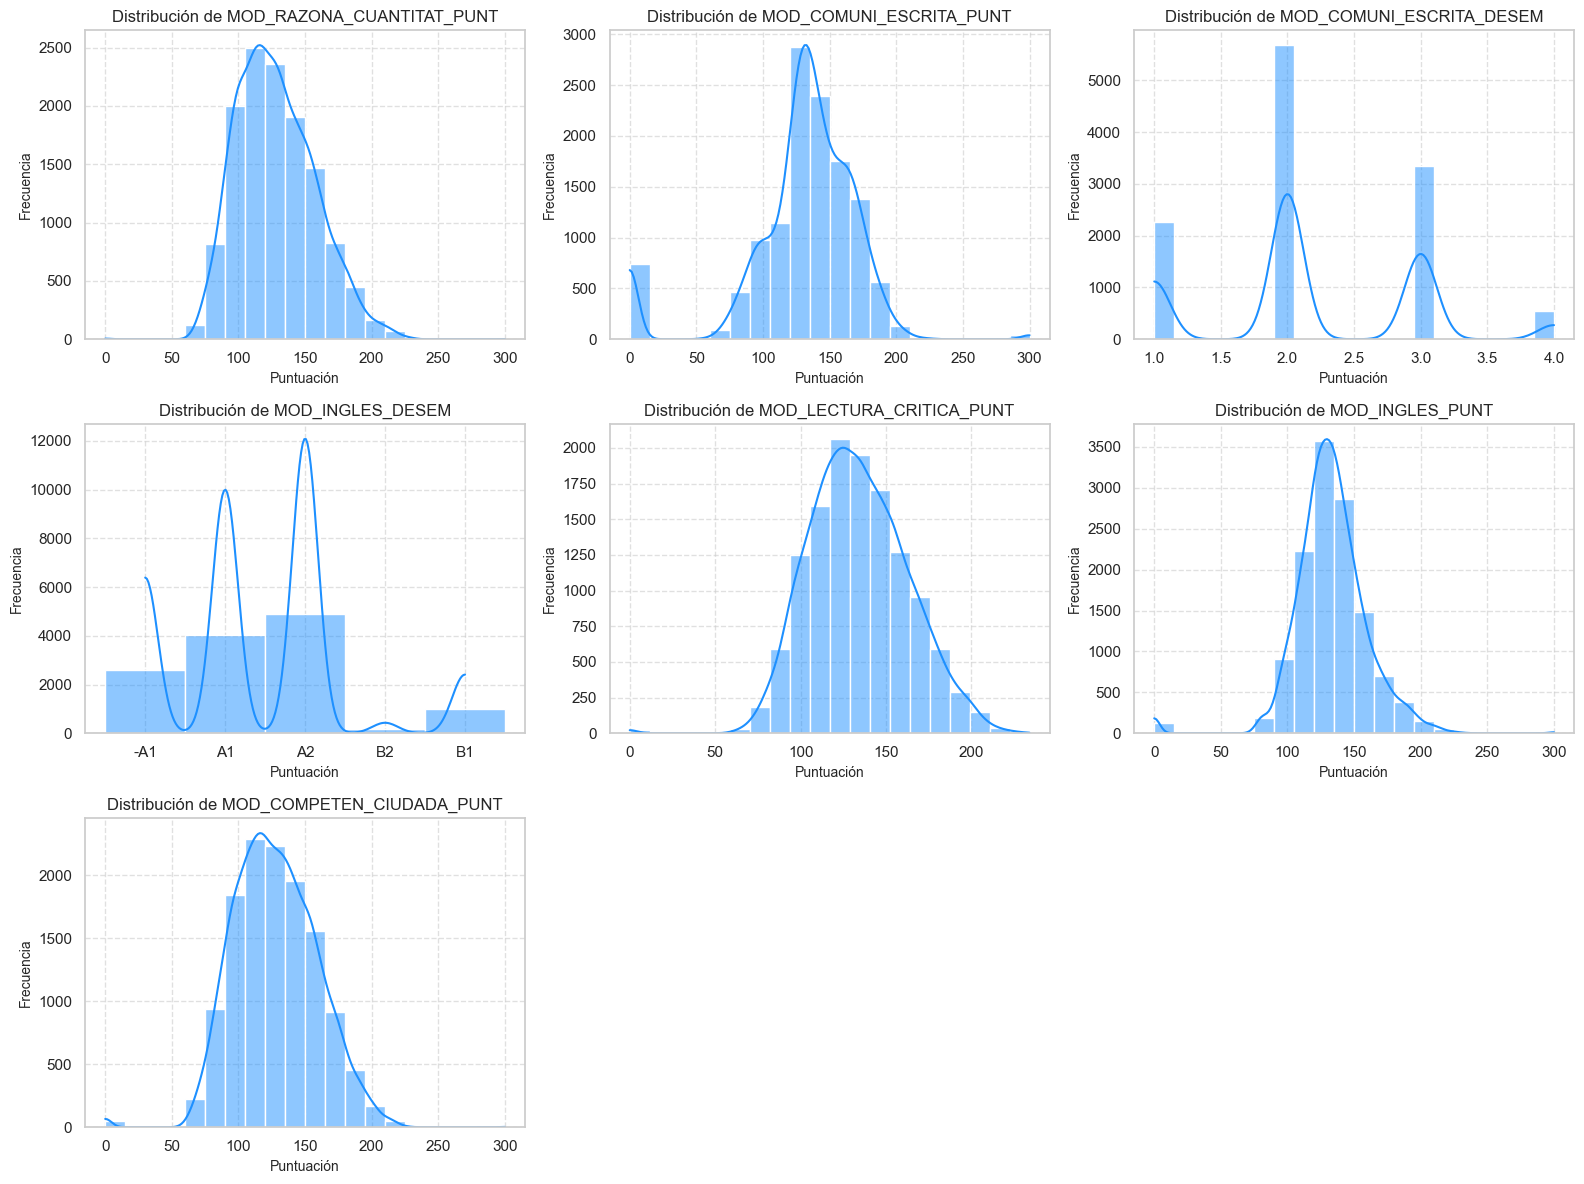

In [41]:
# Lista de variables cuantitativas
variables_cuantitativas = [
    'MOD_RAZONA_CUANTITAT_PUNT',
    'MOD_COMUNI_ESCRITA_PUNT',
    'MOD_COMUNI_ESCRITA_DESEM',
    'MOD_INGLES_DESEM',
    'MOD_LECTURA_CRITICA_PUNT',
    'MOD_INGLES_PUNT',
    'MOD_COMPETEN_CIUDADA_PUNT'
]

plt.figure(figsize=(16, 12))

for i, variable in enumerate(variables_cuantitativas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_laguajira[variable], bins=20, kde=True, color='dodgerblue')
    plt.title(f'Distribución de {variable}', fontsize=12)
    plt.xlabel('Puntuación', fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

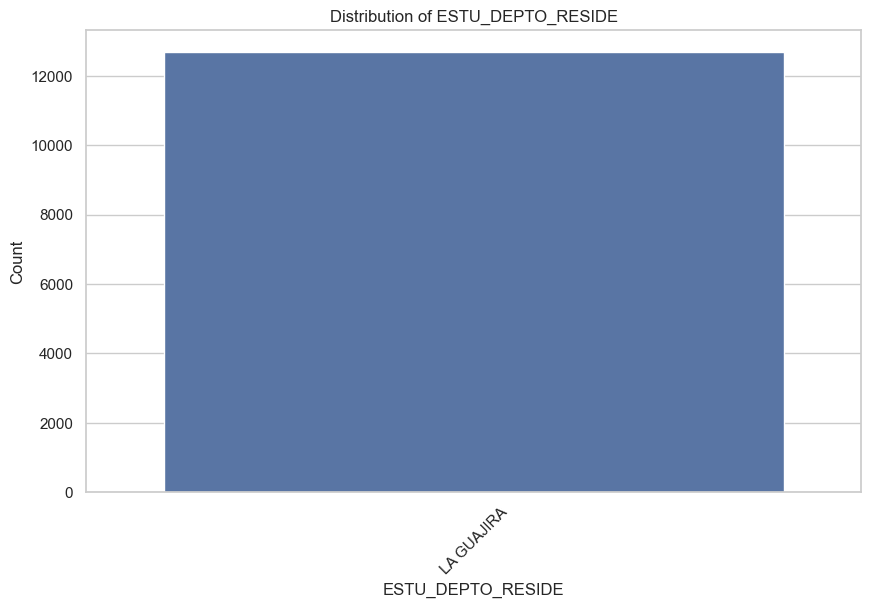

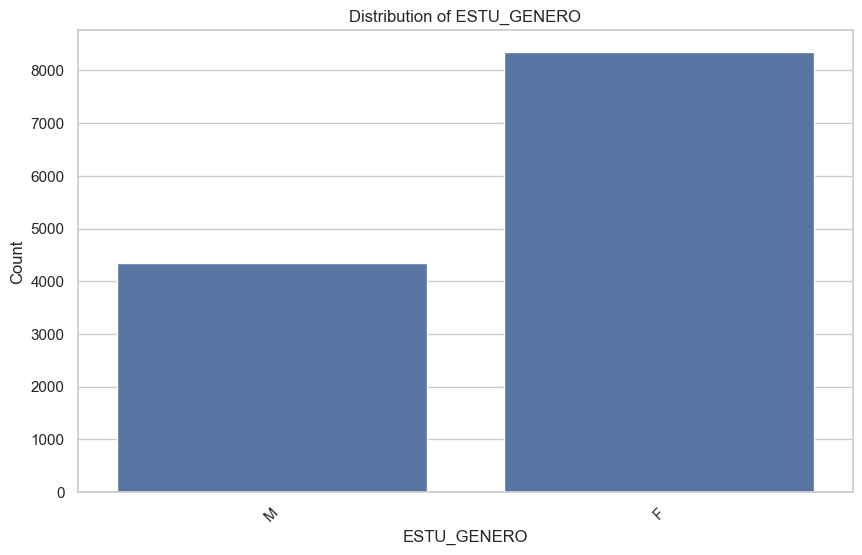

In [38]:
# Datos Demográficos
def eda_demograficos(df_laguajira, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_laguajira, x=var)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
eda_demograficos(df_laguajira, demograficos)

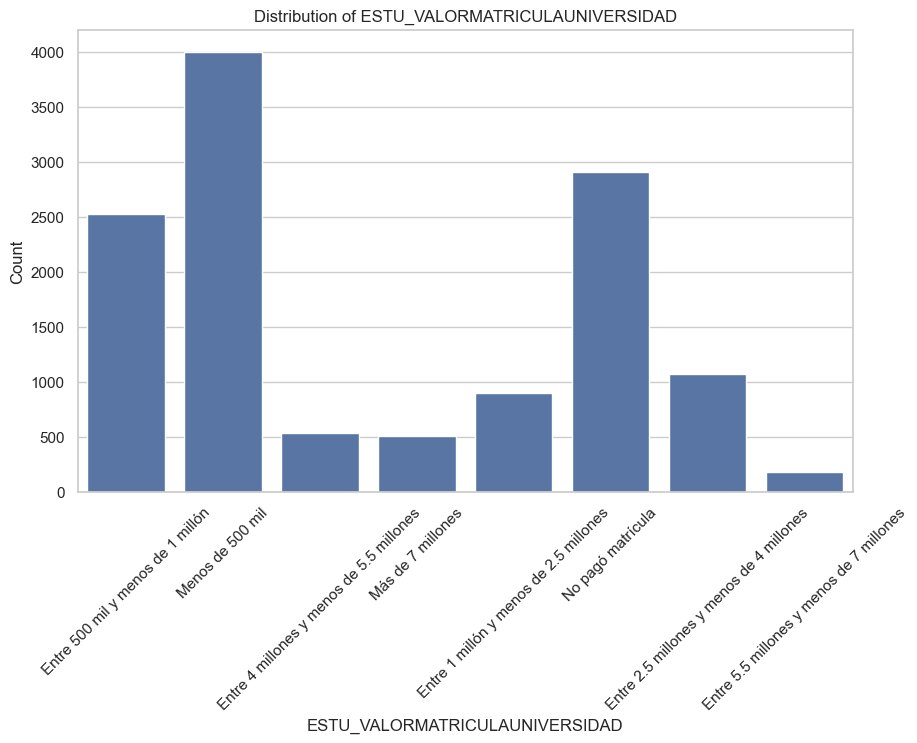

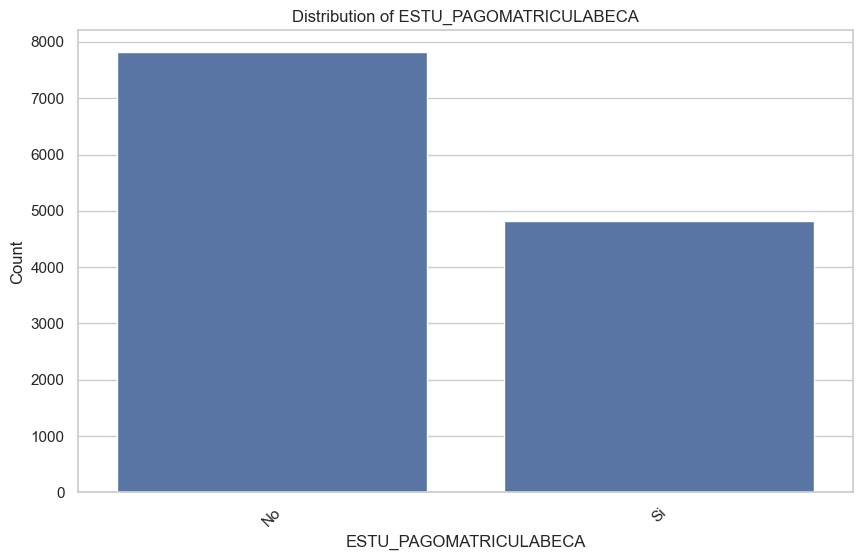

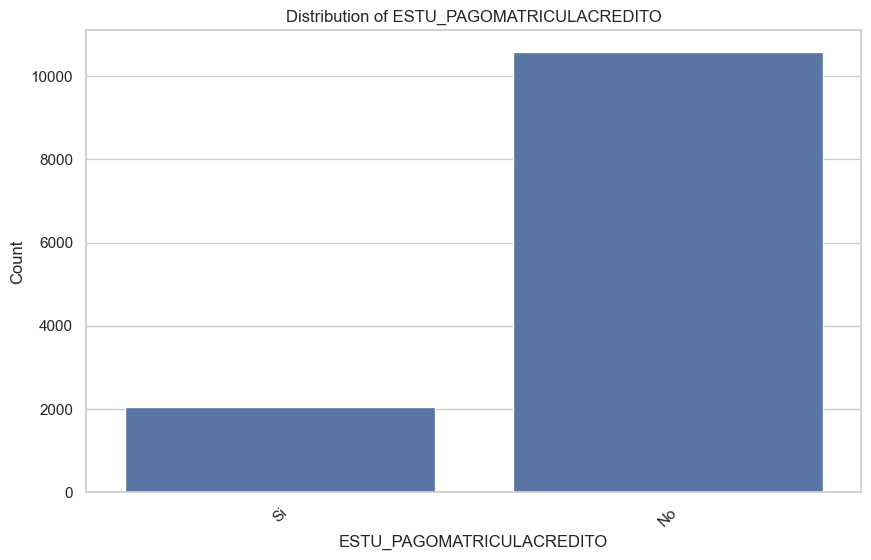

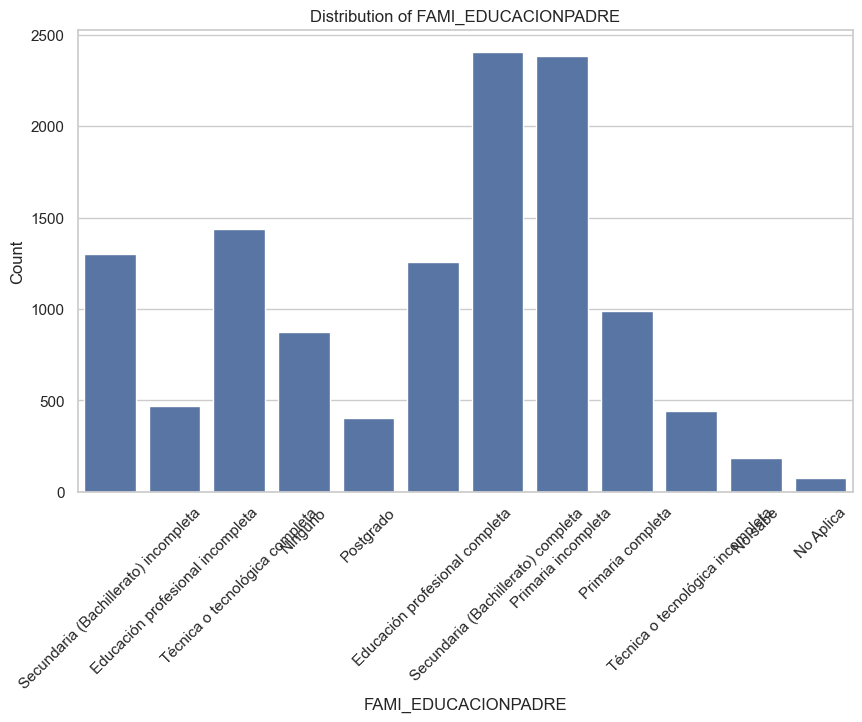

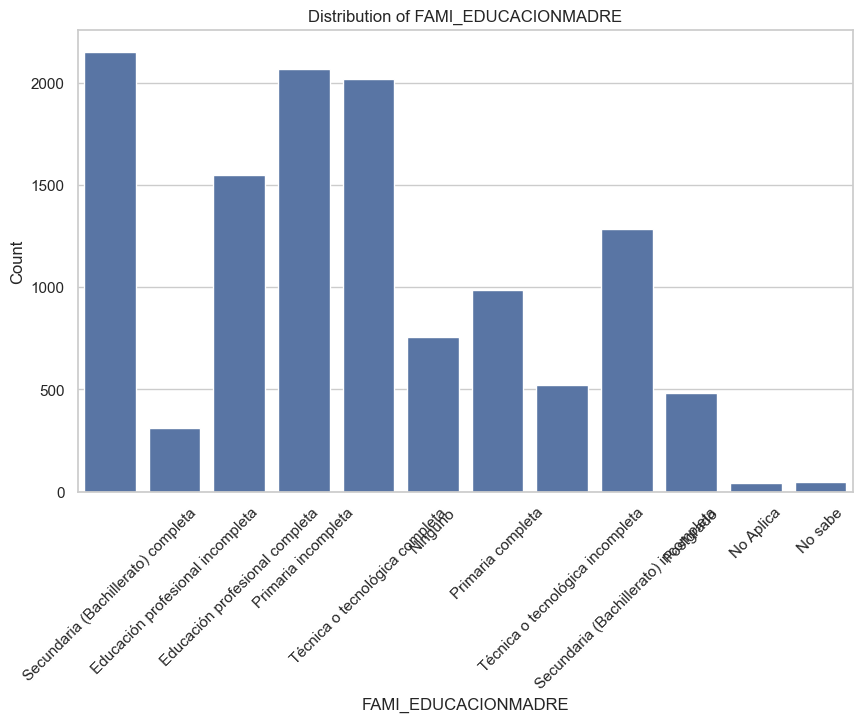

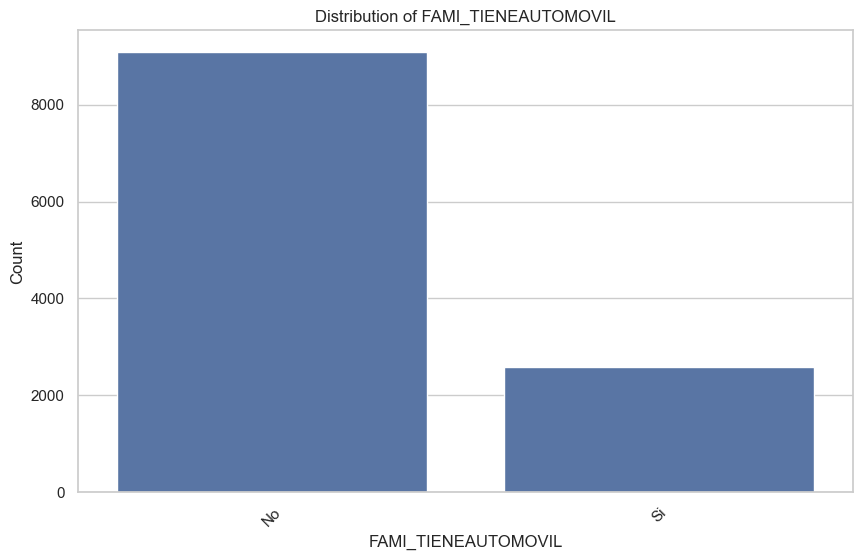

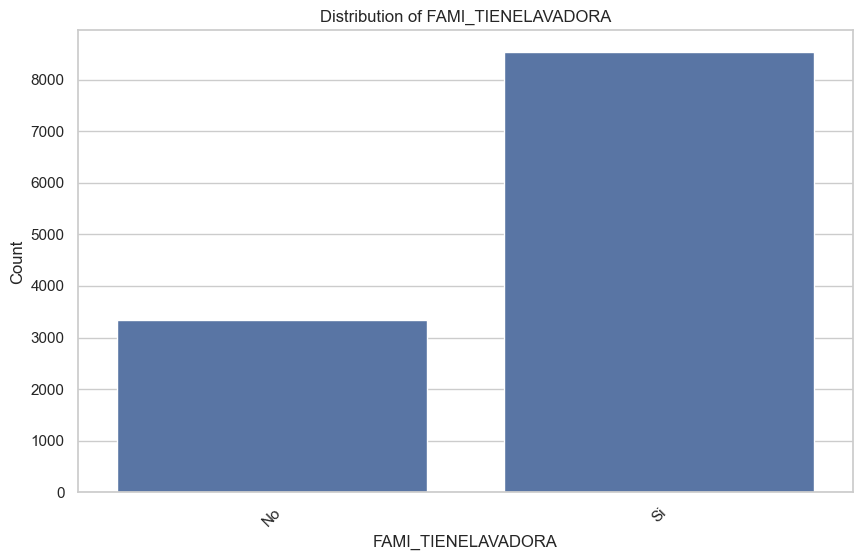

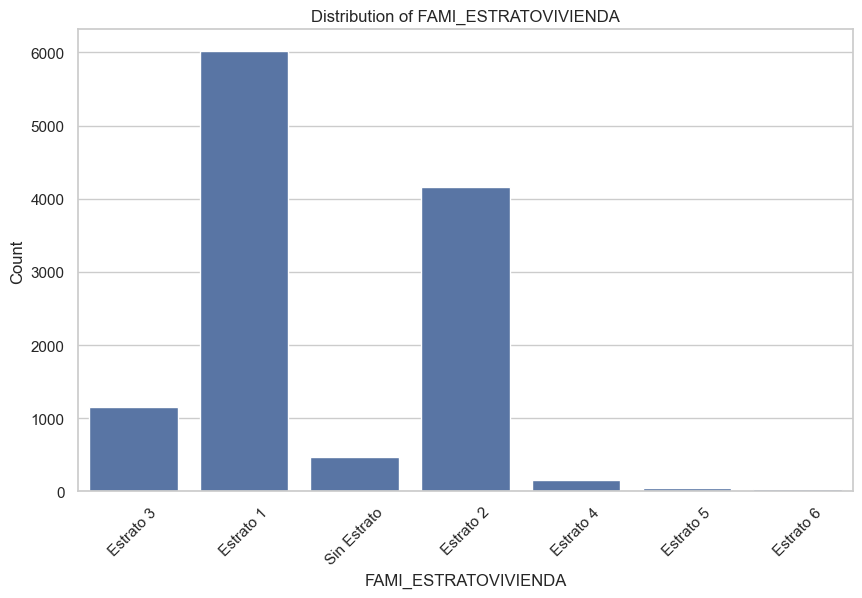

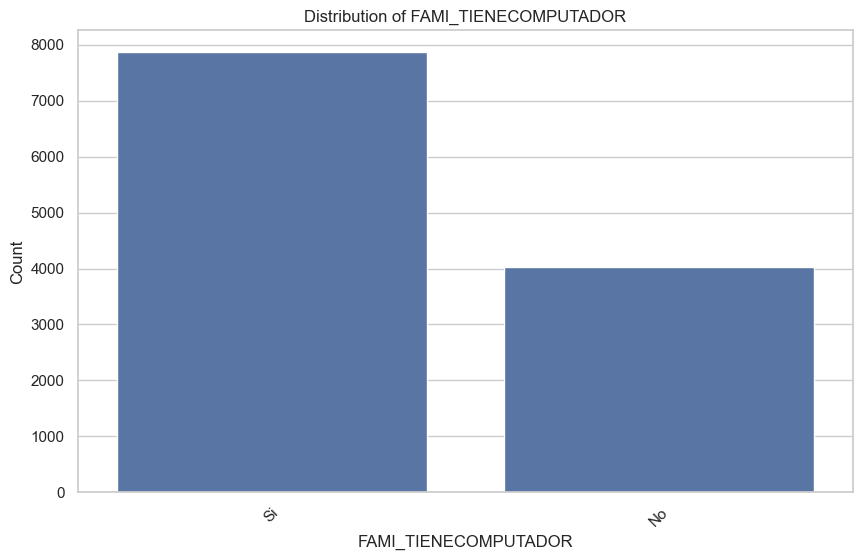

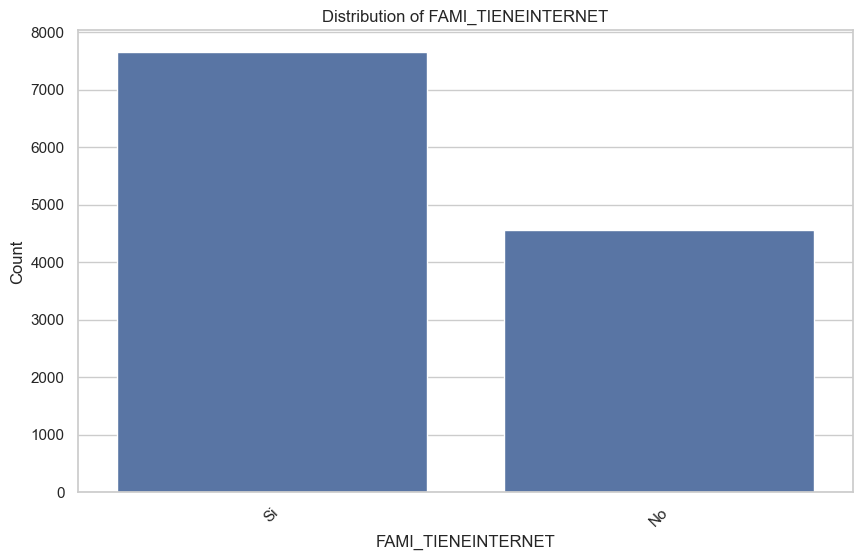

In [26]:
# Aspectos Económicos y Sociales
def eda_economicos_sociales(df_laguajira, variables):
    for var in variables:
        plt.figure(figsize=(10, 6))
        if df_laguajira[var].dtype in ['float64', 'int64']:
            sns.histplot(df_laguajira[var].dropna(), kde=True)
            plt.title(f'Distribution of {var}')
            plt.xlabel(var)
            plt.ylabel('Frequency')
        else:
            sns.countplot(data=df_laguajira, x=var)
            plt.title(f'Distribution of {var}')
            plt.xlabel(var)
            plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
eda_economicos_sociales(df_laguajira, economicos_sociales)

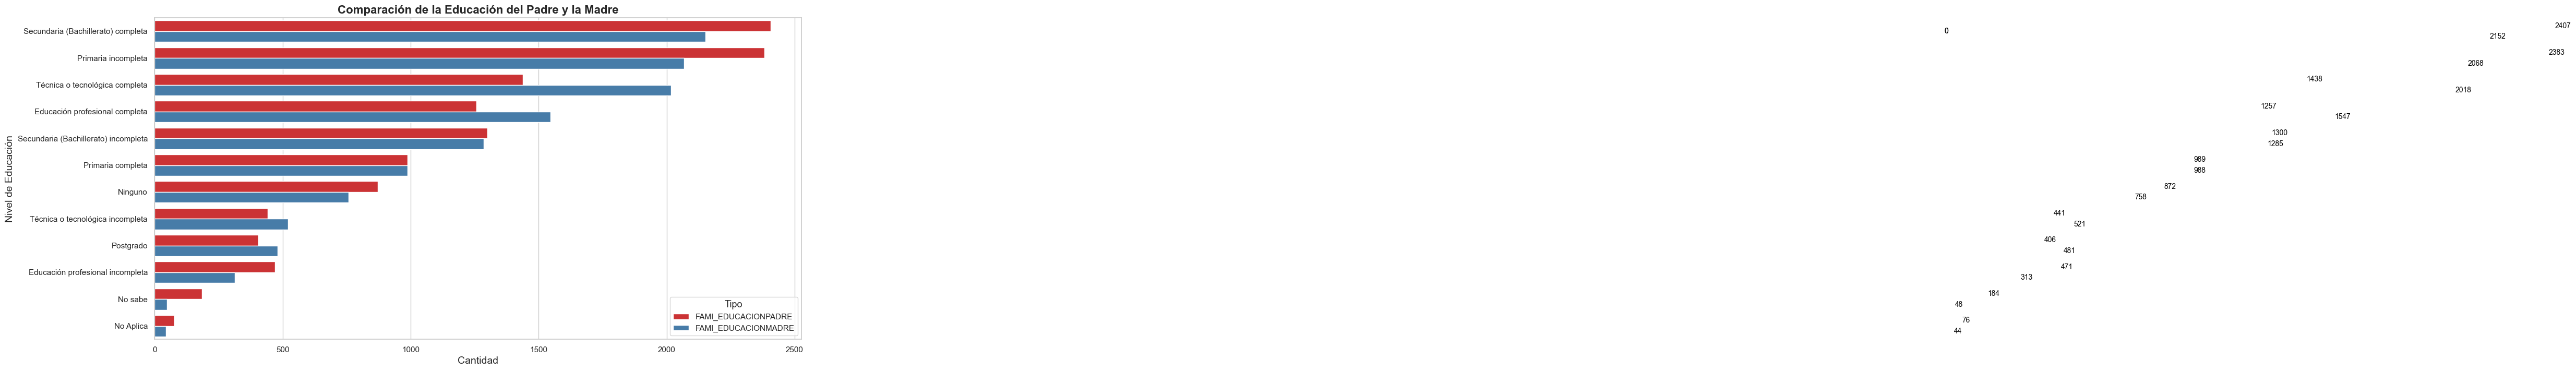

In [27]:
df_comparacion = pd.melt(df_laguajira[['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']], 
                         value_vars=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], 
                         var_name='Tipo', 
                         value_name='Educacion')


plt.figure(figsize=(16, 8))
sns.countplot(data=df_comparacion, y='Educacion', hue='Tipo', palette='Set1', order=df_comparacion['Educacion'].value_counts().index)

# titulo y labels
plt.title('Comparación de la Educación del Padre y la Madre', fontsize=16, weight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Nivel de Educación', fontsize=14)

# Labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 7000, p.get_y() + p.get_height() / 2, f'{int(width)}', 
             ha='center', va='center', fontsize=10, color='black')

# Leyenda
plt.legend(title='Tipo', title_fontsize='13', fontsize='11', loc='lower right')

# Ajustar el layout
plt.tight_layout()

plt.show()

3.Analisis Exploratorio de Datos (EDA)


A continuación se presentan algunos resultados del análisis para el departamento de La Guajira:

### Desempeño Académico


   - Los resultados promedio de desempeño están por debajo de la media de 145 puntos.
   - En **MOD_RAZONA_CUANTITAT_PUNT**, los resultados predominan alrededor de 120, lo que indica un rendimiento por debajo del promedio. Presenta una distribución simetrica. 

   - En **MOD_COMUNI_ESCRITA_PUNT**, la mayoría de los puntajes están por debajo de la media. Presenta una distribución simetrica. 
   - En **MOD_COMUNI_ESCRITA_DESEM**, el puntaje predominante es 2.0, lo que refleja debilidades en las habilidades de escritura de los docentes.

**Competencias en Inglés**:
   - En **MOD_INGLES_DESEM**, la mayoría de los estudiantes obtuvieron resultados de A2, A1 y -A1, con pocos alcanzando un nivel superior como B1.
   - En **MOD_INGLES_PUNT**, los puntajes están concentrados entre 100 y 200 puntos, con una mayor concentración de estudiantes en el rango inferior a 150 puntos. Presenta una distrubición leptocúrtica. 

**Lectura Crítica**:
   - En **MOD_LECTURA_CRITICA_PUNT**, los puntajes están por debajo de la media, y se observa una disminución en el número de estudiantes que superan este umbral. Estos resultados muestran una distibución con sesgo hacía la izquierda. 

**Competencia Ciudadana**:
   - En **MOD_COMPETEN_CIUDADA_PUNT**, los puntajes están entre 120 y 140, todos por debajo de la media de 145 puntos.

Datos Sociodemográficos

**Sexo**:
   - Hay una mayor participación de estudiantes femeninas (más de 8,000) en comparación con los masculinos (entre 4,000 y 4,500).

**Acceso a Tecnología**:
   - Más de 7,000 familias tienen acceso a internet, pero alrededor de 4,500 no tienen acceso a este recurso.
   - Aproximadamente 8,000 estudiantes tienen computador, mientras que 4,000 no cuentan con uno.

**Estrato Socioeconómico**:
   - El estrato 1 es el más representado con 6,000 estudiantes.
   - El estrato 2 cuenta con 4,100 estudiantes, y el estrato 3 es el siguiente en términos de representación.
   - Los estratos más altos tienen una baja representación.

### Educación de los Padres

**Educación Secundaria**:
   - Los padres con secundaria completa son 2,300, y las madres son aproximadamente 2,100.

**Educación Superior**:
   - En formación de pregrado, las madres sobresalen con 1,600, mientras que los padres tienen 1,300.
   - La educación de posgrado tanto para padres como para madres es menor a 500.

### Insights

- Los estudiantes en La Guajira muestran un desempeño académico que está consistentemente por debajo de la media en las distintas áreas evaluadas, con especial debilidad en comunicación escrita y competencias en inglés.
- Hay una notable brecha en el acceso a tecnología y recursos, con una parte significativa de estudiantes sin acceso a internet o computadoras.
- La mayoría de los estudiantes provienen de estratos bajos, lo cual puede estar correlacionado con el rendimiento académico.
- El nivel educativo de los padres muestra una predominancia de secundaria completa y una menor representación en educación superior.

Estos insights pueden ser útiles para diseñar estrategias de intervención y apoyo para mejorar el desempeño académico y las condiciones socioeconómicas en La Guajira.

4. Con base en las visualizaciones y resumenes numericos generados del desafıo anterior dar recomendaciones basados en los insights observados.

Dentro de las recomendaciones que se pueden extraer del EDA, son:

Implementar Programas de Recuperación Académica: Desarrollar e implementar programas de tutoría y recuperación académica centrados en las áreas con puntajes más bajos, como razonamiento cuantitativo, comunicación escrita y competencias en inglés.
Formación docente: Proporcionar formación continua a los docentes para mejorar sus habilidades pedagógicas y metodológicas, especialmente en las áreas donde los resultados son más bajos.


Comunicación Escrita:

Desarrollar Talleres de Escritura: Crear talleres y cursos de desarrollo de habilidades de escritura para estudiantes y docentes, con énfasis en mejorar la calidad de la redacción y expresión escrita.
Promover la Escritura Creativa: Fomentar actividades y proyectos de escritura creativa en las aulas para mejorar el interés y la habilidad en la comunicación escrita.

Competencias en Inglés:

Fortalecer la Enseñanza del Inglés: Introducir programas de inmersión y cursos intensivos de inglés para mejorar el nivel general. Utilizar recursos como aplicaciones educativas y plataformas en línea para practicar el idioma.


Lectura Crítica:

Implementar Estrategias de Lectura Crítica: Introducir estrategias específicas de lectura crítica en el currículo, como análisis de textos y discusión crítica, para desarrollar habilidades de comprensión y análisis profundo.
Fomentar el Habito de la Lectura: Promover el hábito de la lectura a través de clubes de lectura y programas de incentivación, tanto en las escuelas como en la comunidad.

Competencia Ciudadana:

Desarrollar Programas de Formación Ciudadana: Ofrecer programas y actividades que enseñen habilidades de ciudadanía activa y responsable, integrando temas de ética, derechos y deberes ciudadanos.

Recomendaciones Basadas en Datos Sociodemográficos
Acceso a Tecnología:

Ampliar el Acceso a Internet y Computadoras: Implementar programas de donación de equipos y subvenciones para familias con bajos recursos. Establecer centros comunitarios con acceso a internet y computadoras para estudiantes.
Formación en Tecnología: Ofrecer capacitación para estudiantes y familias sobre el uso de tecnología y recursos digitales para que puedan aprovechar mejor las herramientas disponibles.


Estrato Socioeconómico:

Desarrollar Iniciativas de Apoyo para Estratos Bajos: Crear programas de apoyo económico y educativo específicamente para estudiantes de estratos más bajos, incluyendo becas y subsidios para materiales escolares.
Involucrar a la Comunidad en el Apoyo Educativo: Fomentar la colaboración entre organizaciones comunitarias, empresas y el gobierno para proporcionar recursos y apoyo adicional a las familias de estratos bajos.


Fortalecimiento de la Educación Familiar:

Programas de Educación para Padres: Implementar talleres y programas educativos para padres sobre cómo apoyar el aprendizaje de sus hijos y la importancia de la educación.
Incentivar la Educación Continua: Ofrecer oportunidades para que los padres continúen su educación, como cursos de capacitación y formación, especialmente en áreas que les ayuden a apoyar a sus hijos en el entorno escolar.

Fomentar la Participación Familiar:

Crear Espacios para la Participación Familiar: Establecer plataformas y eventos donde los padres puedan involucrarse en la vida escolar de sus hijos, contribuyendo al apoyo académico y al fortalecimiento de la comunidad educativa.
Estas recomendaciones están diseñadas para abordar las áreas críticas identificadas en el desempeño académico y las condiciones socioeconómicas de La Guajira, con el objetivo de mejorar tanto los resultados educativos como las oportunidades para los estudiantes y sus familias.

5. Para esta oportunidad se deberan tener avances en los apartados: Definicion de objetivo, Contexto comercial, Problema Comercial, Contexto analıtico, Exploracion de datos (EDA)

Definición de Objetivo:

Objetivo Principal: El objetivo de esta minería de datos educativos es analizar la relación entre las variables cuantitativas, demográficas, académicas y socioeconómicas de los estudiantes de La Guajira para identificar patrones y tendencias que influyan en su rendimiento académico en las pruebas SABER-PRO. El análisis buscará descubrir factores que afectan el desempeño académico y ofrecer recomendaciones para mejorar las condiciones educativas y socioeconómicas en la región.


Contexto Comercial:

La Prueba Saber Pro es un examen estandarizado en Colombia, aplicado a estudiantes que están por graduarse de programas de educación superior. Organizado por el Instituto Colombiano para la Evaluación de la Educación (ICFES), este examen evalúa competencias en áreas como razonamiento crítico, lectura crítica, matemáticas, ciencias naturales y sociales, así como competencias específicas del programa académico. Los resultados son cruciales para que las instituciones educativas mejoren la calidad de sus programas y ajusten sus currículos basándose en las fortalezas y debilidades identificadas.
Contexto Local: En La Guajira, los estudiantes presentan un desempeño académico por debajo de la media en diversas áreas evaluadas, lo que refleja un desafío significativo para la educación en la región. Los datos también revelan desigualdades en el acceso a tecnología y recursos educativos.

Problema Comercial:

 Los estudiantes de La Guajira enfrentan un rendimiento académico bajo en las pruebas SABER-PRO, con debilidades notables en comunicación escrita y competencias en inglés. Además, existe una brecha en el acceso a tecnología, con una parte significativa de estudiantes sin internet o computadoras. La mayoría proviene de estratos socioeconómicos bajos y sus padres tienen niveles educativos predominantemente bajos, lo que puede contribuir a los desafíos académicos que enfrentan.


Contexto Analítico:

Metodología: El análisis se basará en los datos proporcionados por los resultados de las pruebas SABER-PRO entre 2018 y 2022. Se utilizarán técnicas estadísticas y de minería de datos para examinar las relaciones entre las variables académicas, demográficas y socioeconómicas. Se emplearán herramientas analíticas para identificar patrones y correlaciones significativas que puedan informar estrategias de intervención.
Variables Clave: Las variables a analizar incluirán puntajes en diferentes áreas de la prueba, acceso a tecnología, estrato socioeconómico, y nivel educativo de los padres.

Exploración de Datos (EDA):

Resultados Iniciales: Los resultados del análisis exploratorio muestran que los puntajes promedio en diversas áreas están por debajo de la media, con resultados especialmente bajos en comunicación escrita y competencias en inglés. La brecha en el acceso a tecnología y recursos es significativa, y la mayoría de los estudiantes provienen de estratos socioeconómicos bajos. El nivel educativo de los padres también se presenta como un factor relevante que podría influir en el rendimiento académico.
Próximos Pasos: Continuar con un análisis más profundo para identificar las causas subyacentes de los bajos puntajes y las desigualdades en el acceso a recursos. Desarrollar estrategias basadas en estos hallazgos para mejorar el rendimiento académico y las condiciones socioeconómicas en La Guajira.